# Baldiness Prediction using Classifiers


## Import Library

In [120]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, recall_score
import warnings
from pickle import dump, load

In [47]:
# set configuration of notebook

warnings.filterwarnings('ignore')
set_config(display = 'diagram')
sns.set(rc = {'figure.figsize':(20, 12)})
plt.style.use('ggplot')

## Load Data

In [48]:
# load data kebotakan

df = pd.read_csv("data/for_model.csv")

In [49]:
df.head()

,umur,jenis_kelamin,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,stress,botak_prob
0,27,Perempuan,7.957453e+06,1,0,54.315053,170.428542,Pantone,1,5.0,0.605974
1,53,Perempuan,7.633003e+06,1,0,72.873404,165.530097,Pantone,0,7.0,0.532860
2,37,Perempuan,6.637625e+06,1,0,46.321533,154.599388,Moonsilk,0,4.0,0.418442
3,36,Perempuan,3.624871e+06,1,0,51.539781,167.340481,Deadbuoy,1,9.0,0.804050
4,38,Laki-laki,6.031808e+06,1,0,60.726909,165.514773,Merpati,1,1.0,0.368371


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6881 entries, 0 to 6880
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           6881 non-null   int64  
 1   jenis_kelamin  6881 non-null   object 
 2   gaji           6881 non-null   float64
 3   is_menikah     6881 non-null   int64  
 4   is_keturunan   6881 non-null   int64  
 5   berat          6881 non-null   float64
 6   tinggi         6881 non-null   float64
 7   sampo          6881 non-null   object 
 8   is_merokok     6881 non-null   int64  
 9   stress         6881 non-null   float64
 10  botak_prob     6881 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 591.5+ KB


In [51]:
df['is_bald'] = [1 if i > .5 else 0 for i in df['botak_prob']]
df['bmi'] = round(df['berat']/((df['tinggi']/100)**2), 2)

In [52]:
df.head()

,umur,jenis_kelamin,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,stress,botak_prob,is_bald,bmi
0,27,Perempuan,7.957453e+06,1,0,54.315053,170.428542,Pantone,1,5.0,0.605974,1,18.70
1,53,Perempuan,7.633003e+06,1,0,72.873404,165.530097,Pantone,0,7.0,0.532860,1,26.60
2,37,Perempuan,6.637625e+06,1,0,46.321533,154.599388,Moonsilk,0,4.0,0.418442,0,19.38
3,36,Perempuan,3.624871e+06,1,0,51.539781,167.340481,Deadbuoy,1,9.0,0.804050,1,18.41
4,38,Laki-laki,6.031808e+06,1,0,60.726909,165.514773,Merpati,1,1.0,0.368371,0,22.17


In [64]:
df.describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,botak_prob,is_bald,bmi
count,6881.000000,6.881000e+03,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000
mean,39.501817,8.845035e+06,0.979509,0.204185,55.899453,167.253071,0.495568,5.449499,0.574342,0.654411,20.070471
std,9.919342,4.494911e+06,0.141684,0.403134,9.553737,10.931505,0.500017,2.862160,0.173504,0.475595,3.297995
min,2.000000,1.500000e+06,0.000000,0.000000,40.319619,127.993496,0.000000,1.000000,0.064633,0.000000,12.200000
25%,33.000000,5.725596e+06,1.000000,0.000000,49.282621,159.737255,0.000000,3.000000,0.453967,0.000000,17.720000
50%,39.000000,7.828999e+06,1.000000,0.000000,53.801644,167.156041,0.000000,5.000000,0.567999,1.000000,19.640000
75%,46.000000,1.085018e+07,1.000000,0.000000,60.212057,174.441071,1.000000,8.000000,0.686765,1.000000,22.030000
max,77.000000,5.000000e+07,1.000000,1.000000,126.042823,211.285582,1.000000,10.000000,1.000000,1.000000,36.260000


## EDA

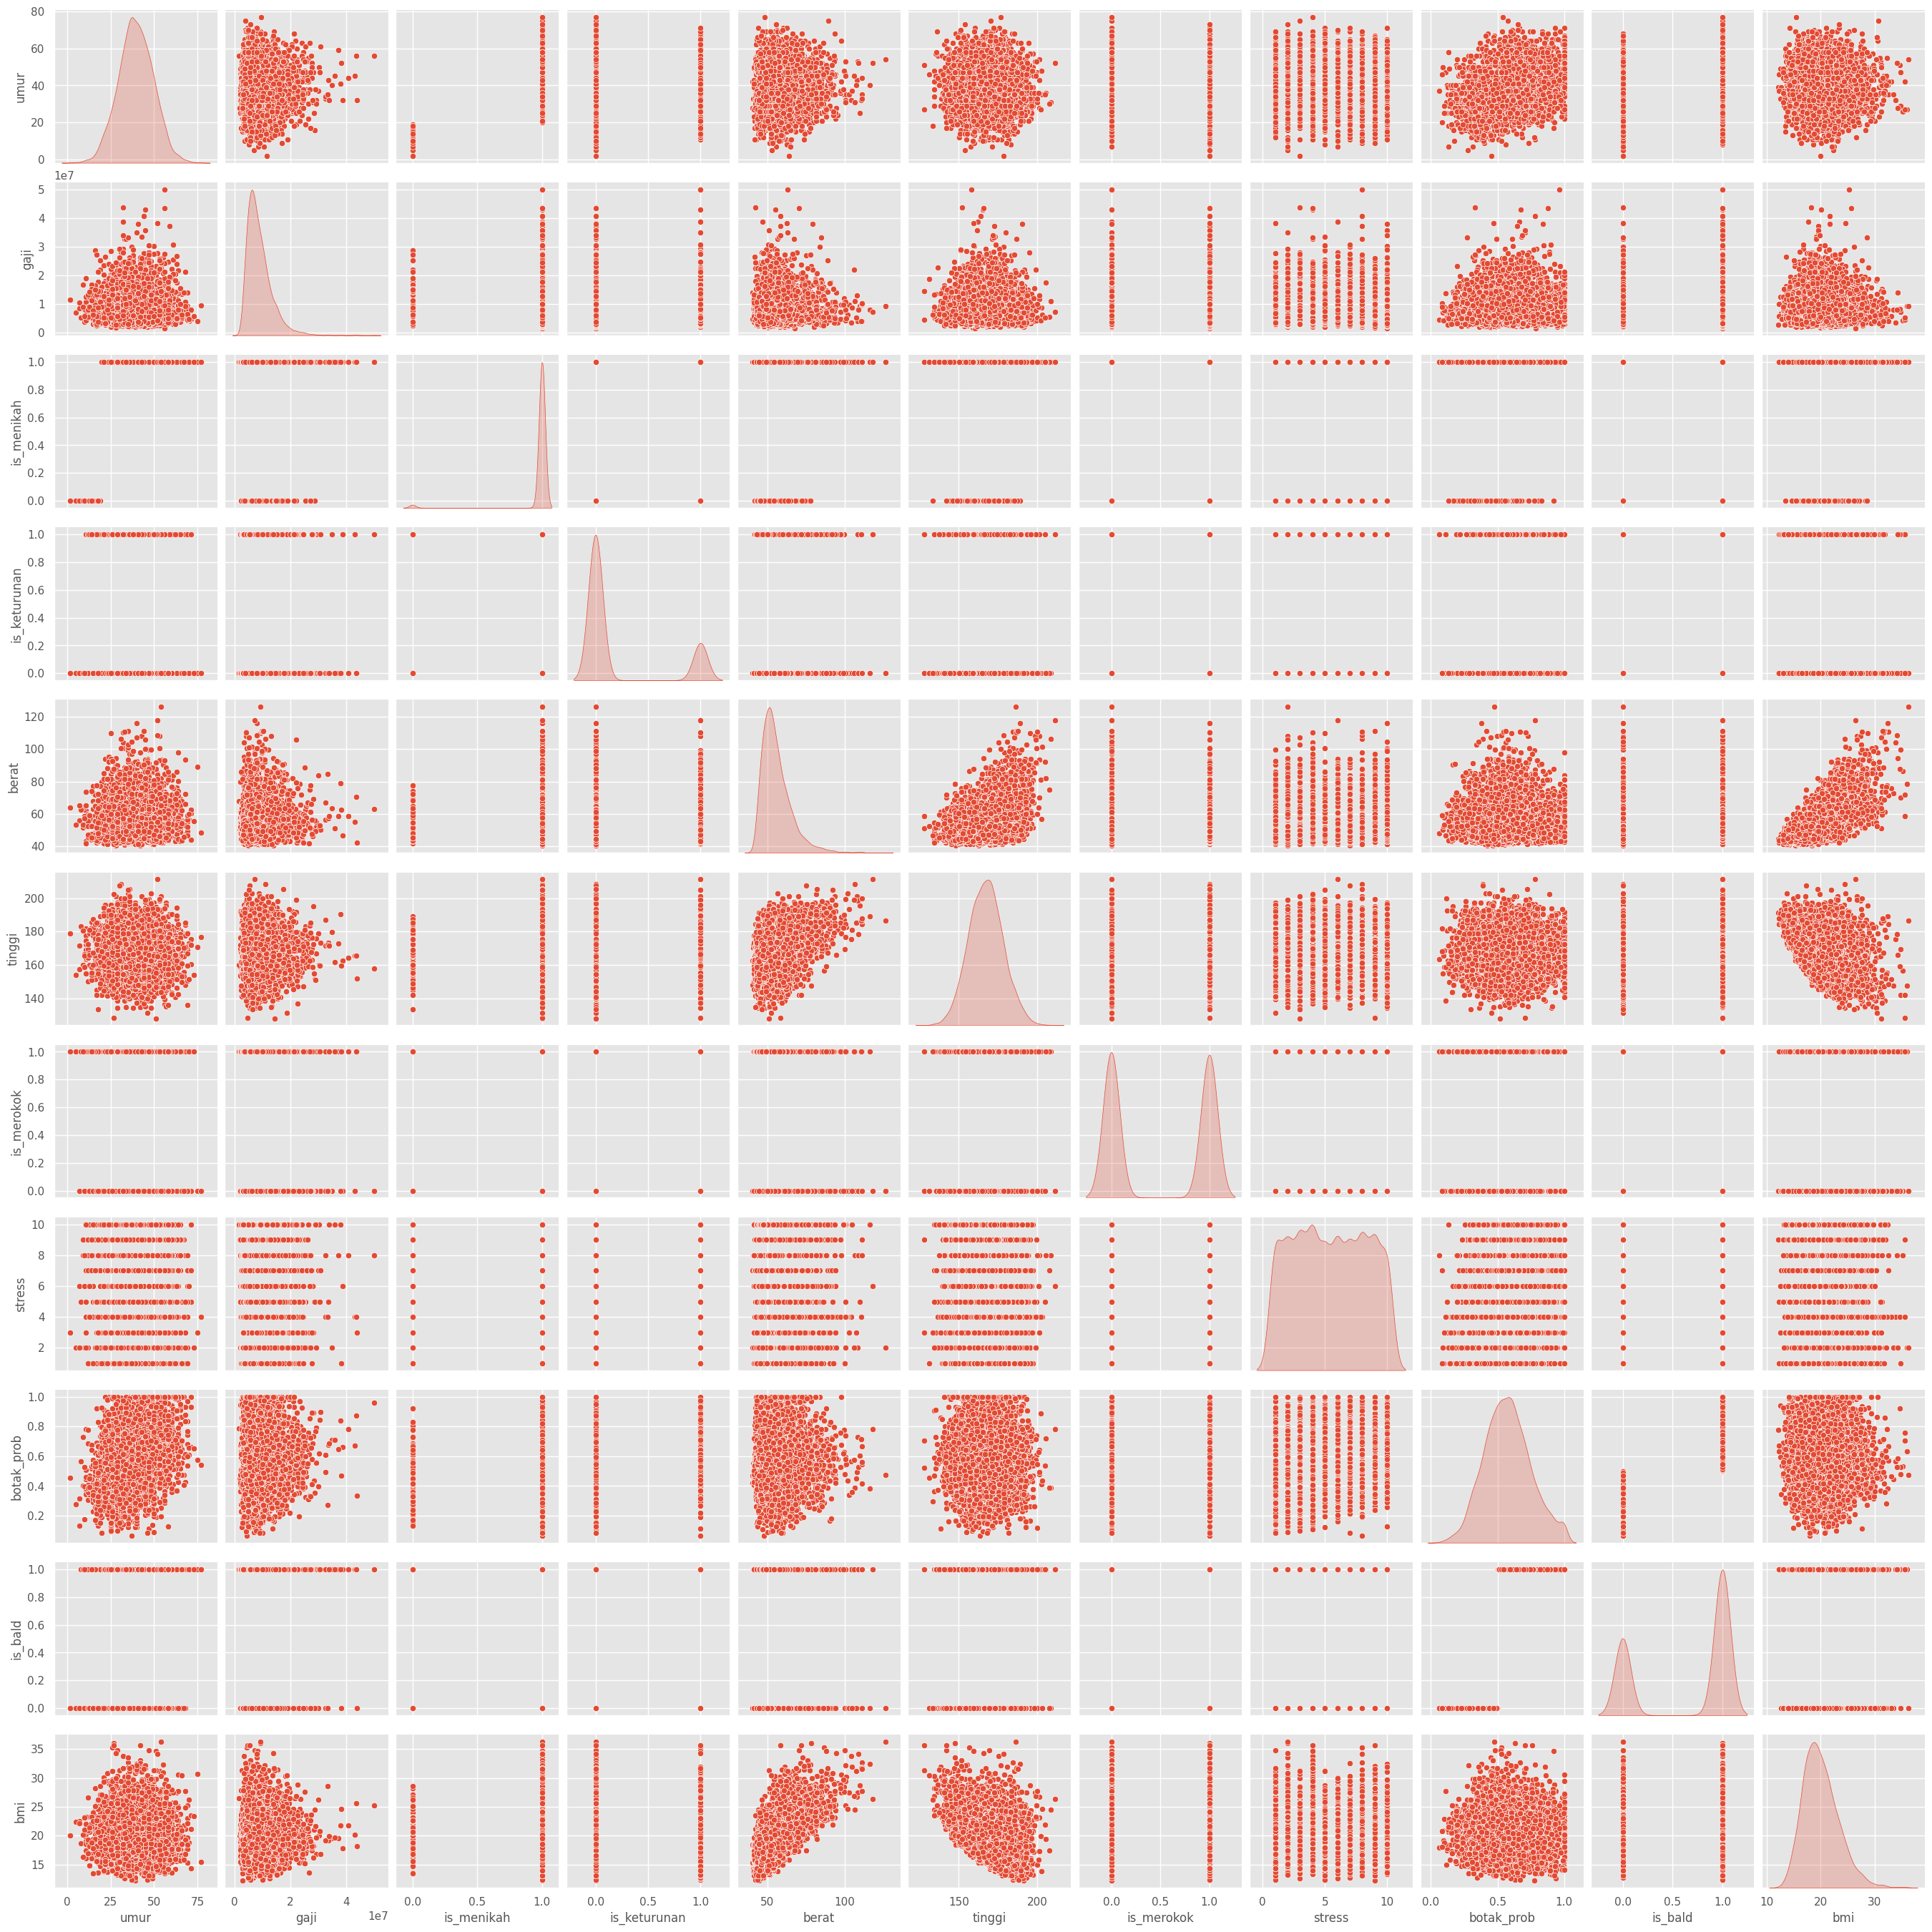

In [53]:
sns.pairplot(df, diag_kind = 'kde')

graph above gave us understanding the distribution of data.

In [54]:
# check correlation

corr = df.corr()

<Axes: >

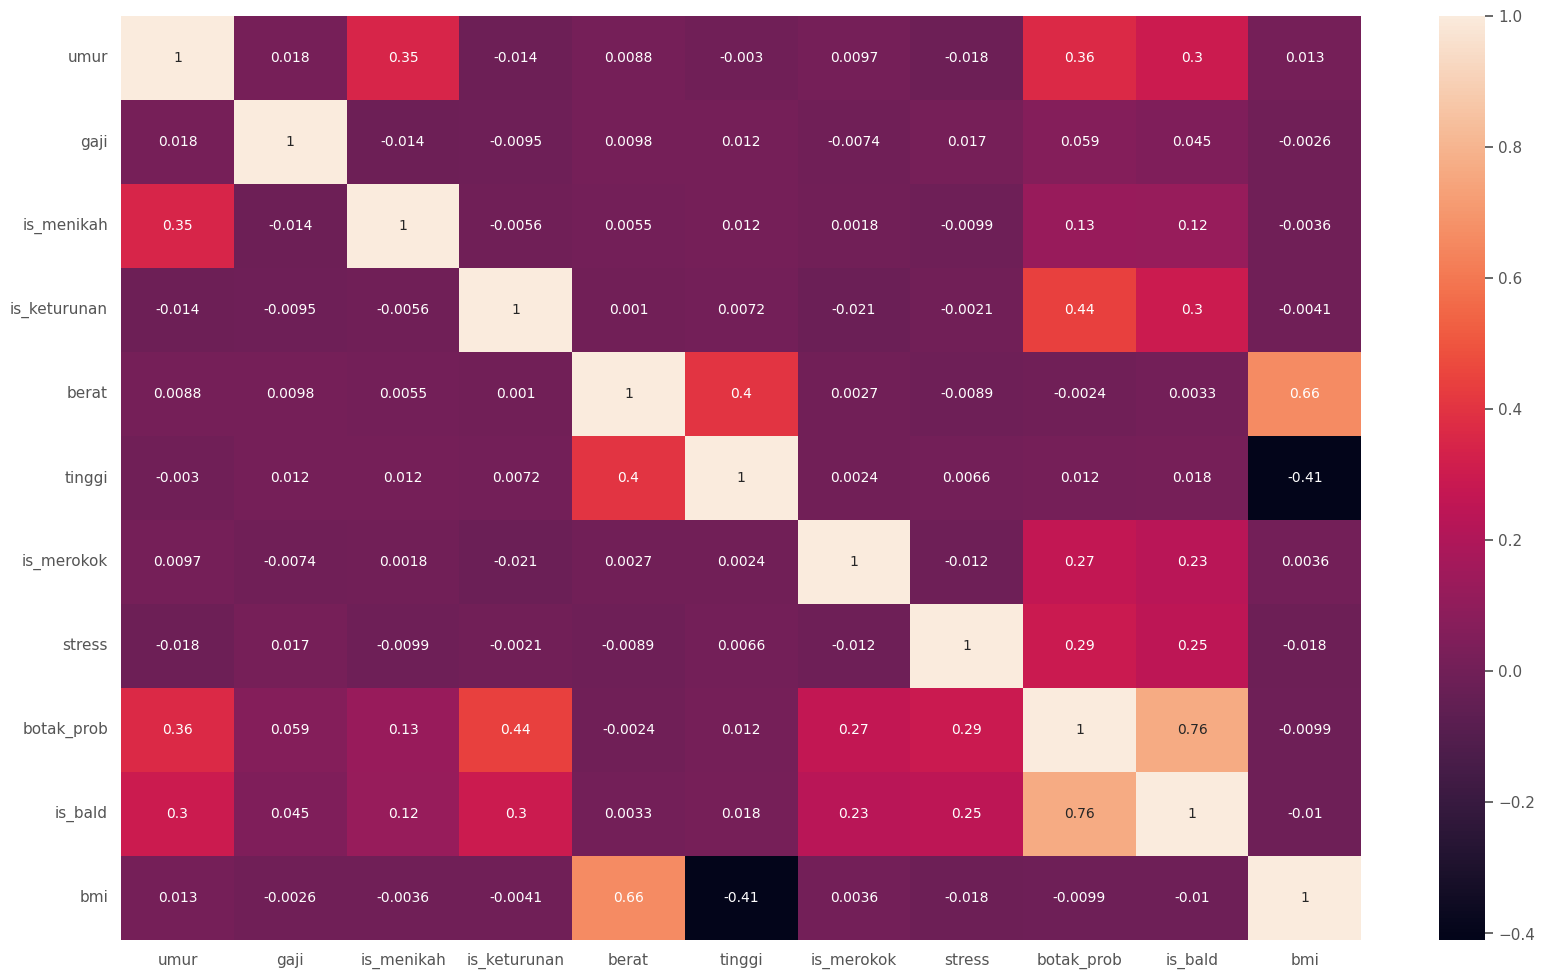

In [55]:
# plot heatmap

sns.heatmap(corr, annot=True)

We can see that `umur`,`is_keturunan`,`is_merokok`, and `stress` have quite high correlation with `botak_prob`. We can start our model with these 4 variables. However, you can also start with all of variables. But be careful using features (X variable) that highly correlated with each other, for example between *bmi* and *berat*, either drop one of them or just omit these two. Also, one of drawback before encoding the category variable is we can't see the correlation with the dummy variable. So we can't see the correlation of `botak_prob` with `jenis_kelamin` and `shampo`. So, let's try encode it first.

In [77]:
# encoding

cat_cols = ['jenis_kelamin', 'sampo']
cat_cols

['jenis_kelamin', 'sampo']

In [78]:
# encoding

encoder = OneHotEncoder(handle_unknown='ignore', drop= 'first')
encoded_array = encoder.fit_transform(df[cat_cols]).toarray()
feature_names = encoder.get_feature_names_out(cat_cols)

In [79]:
df_encode = pd.DataFrame(encoded_array, columns = feature_names).astype(int)

In [80]:
df_encode.head()

,jenis_kelamin_Perempuan,sampo_Merpati,sampo_Moonsilk,sampo_Pantone,sampo_Shoulder & Head
0,1,0,0,1,0
1,1,0,0,1,0
2,1,0,1,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [81]:
# join back with df

df_clean = pd.concat([df.drop(columns = ['jenis_kelamin', 'sampo']), df_encode], axis = 1)

In [82]:
df_clean.head()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,botak_prob,is_bald,bmi,jenis_kelamin_Perempuan,sampo_Merpati,sampo_Moonsilk,sampo_Pantone,sampo_Shoulder & Head
0,27,7.957453e+06,1,0,54.315053,170.428542,1,5.0,0.605974,1,18.70,1,0,0,1,0
1,53,7.633003e+06,1,0,72.873404,165.530097,0,7.0,0.532860,1,26.60,1,0,0,1,0
2,37,6.637625e+06,1,0,46.321533,154.599388,0,4.0,0.418442,0,19.38,1,0,1,0,0
3,36,3.624871e+06,1,0,51.539781,167.340481,1,9.0,0.804050,1,18.41,1,0,0,0,0
4,38,6.031808e+06,1,0,60.726909,165.514773,1,1.0,0.368371,0,22.17,0,1,0,0,0


In [62]:
# check the correlation again

corr_2 = df_clean.corr()

<Axes: >

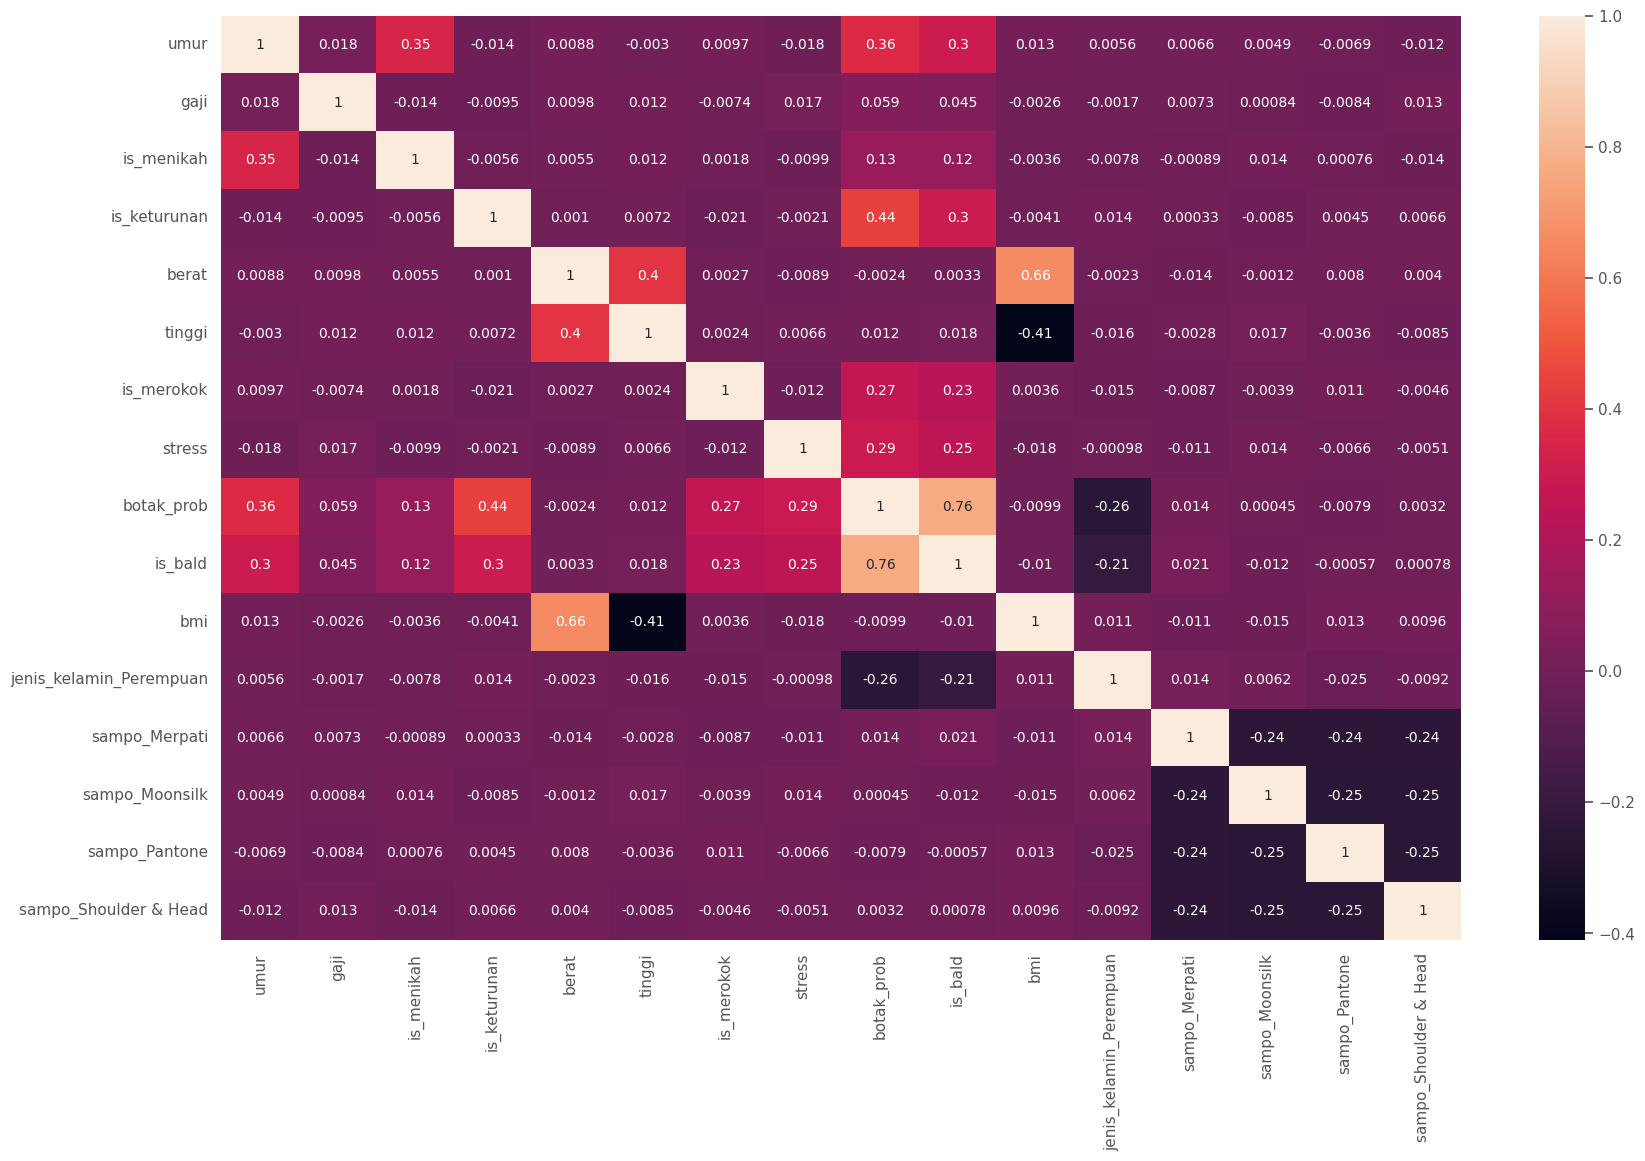

In [63]:
sns.heatmap(corr_2, annot=True)

after encoding we can grasp the correlation of sampo and jenis kelamin to is_bald. We also noticed that bmi correlation is lesser than tinggi and berat. Thus, we will drop bmi from our model.

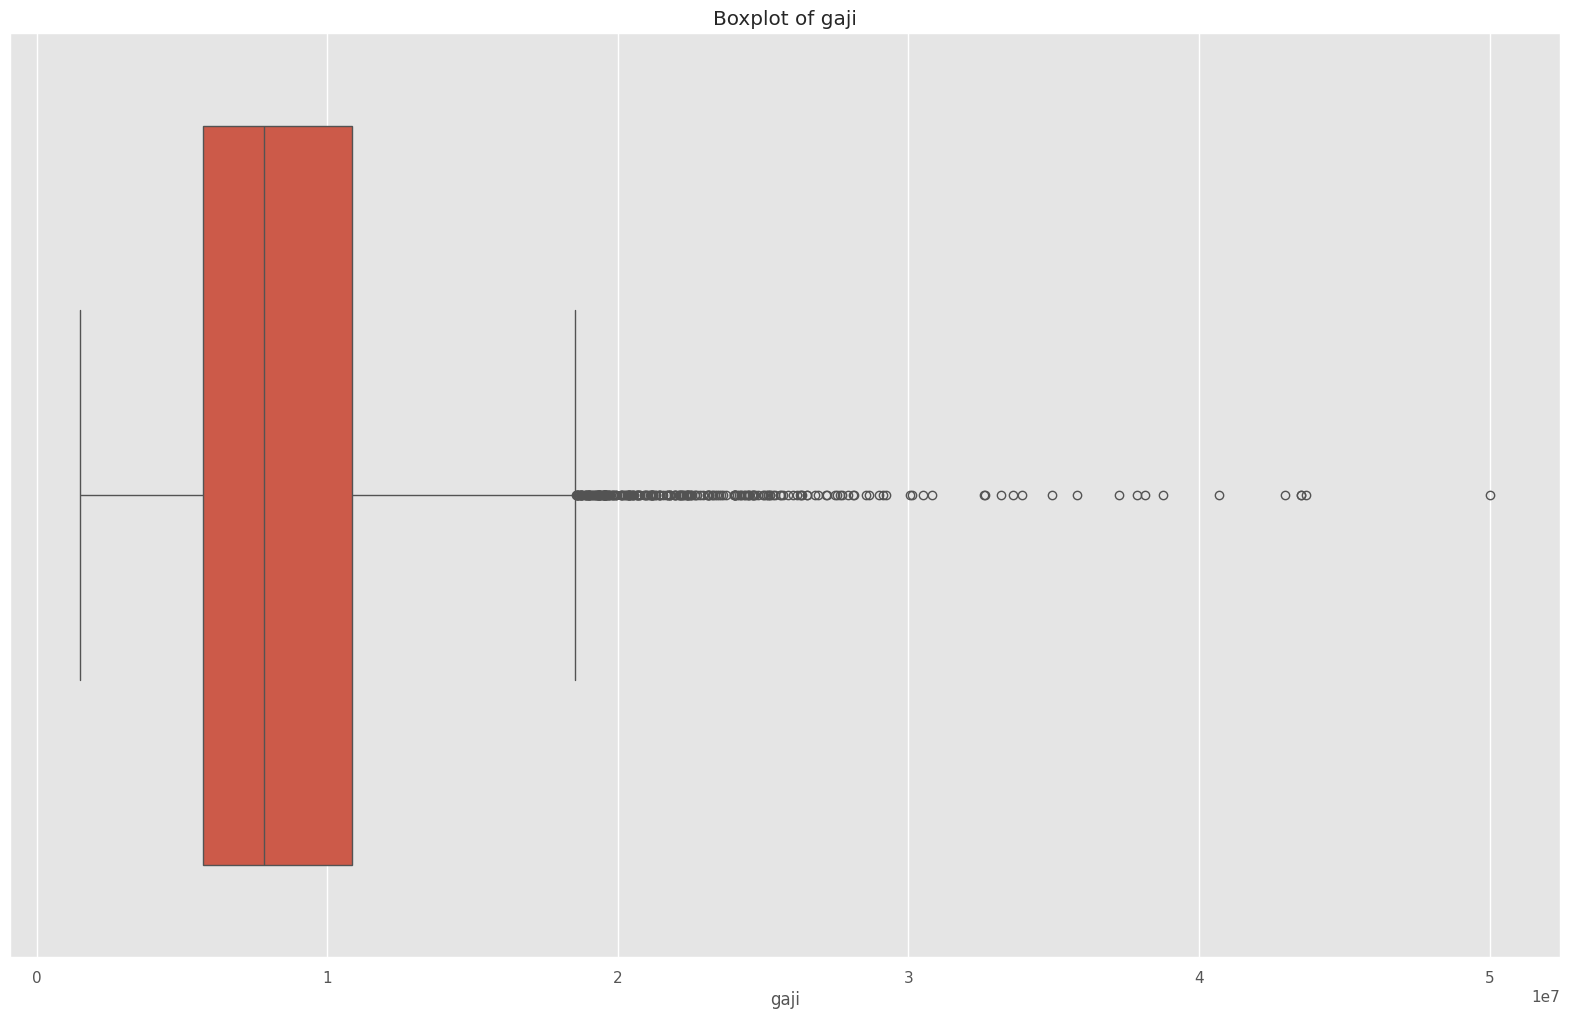

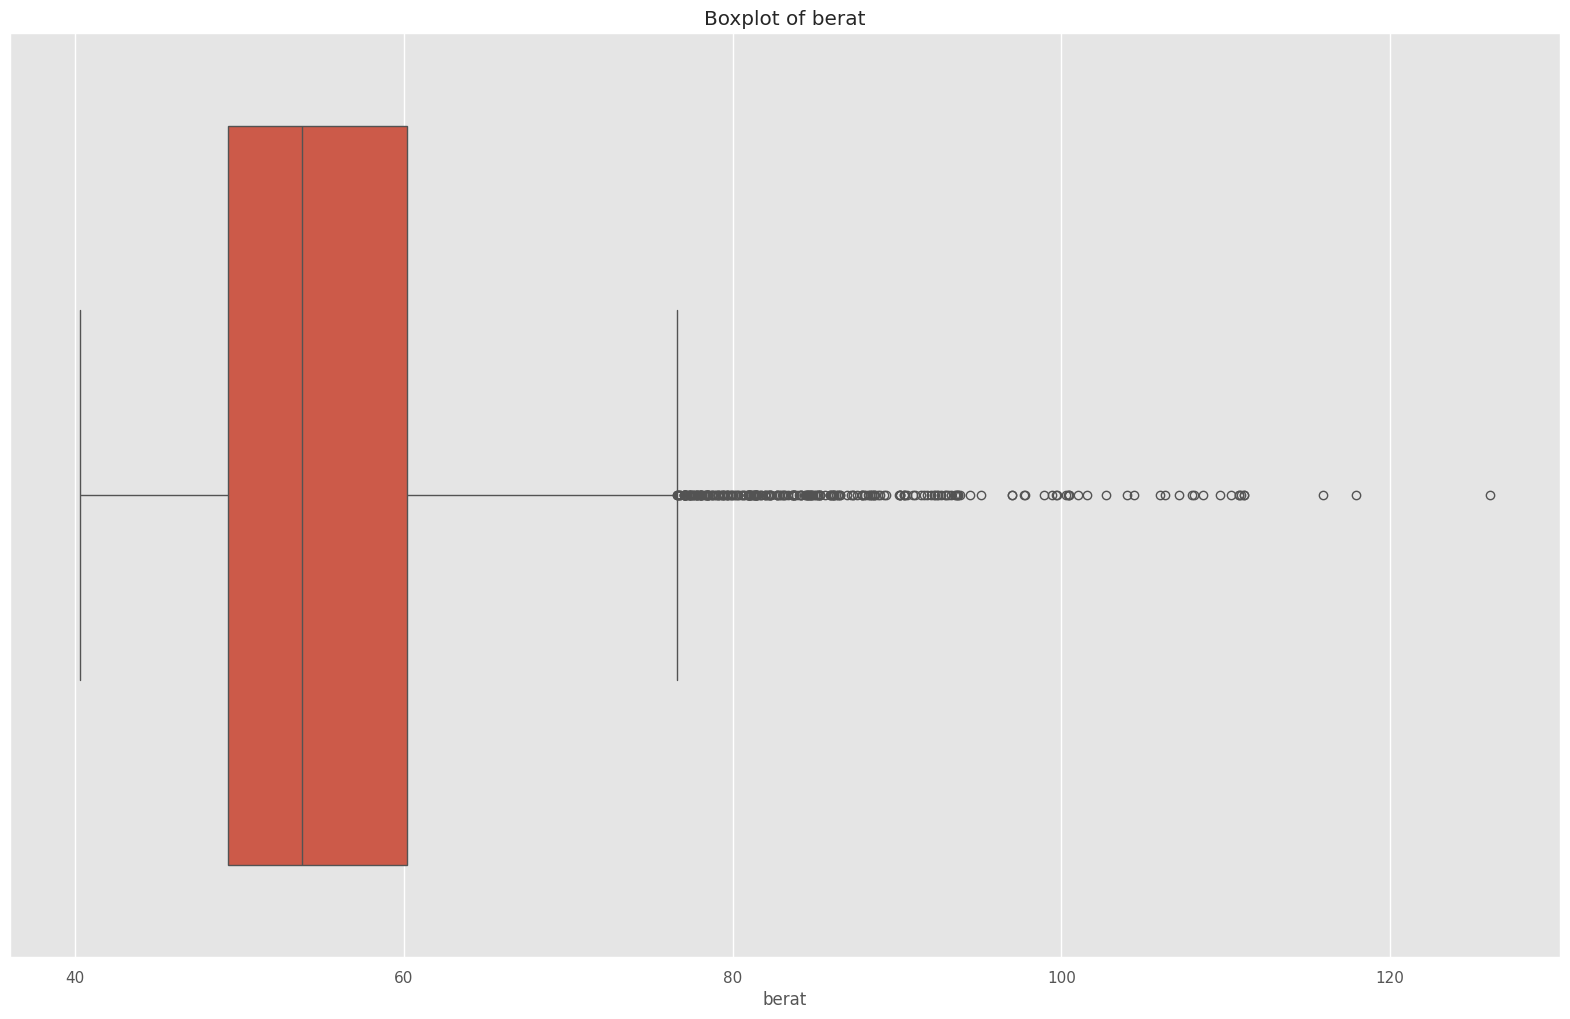

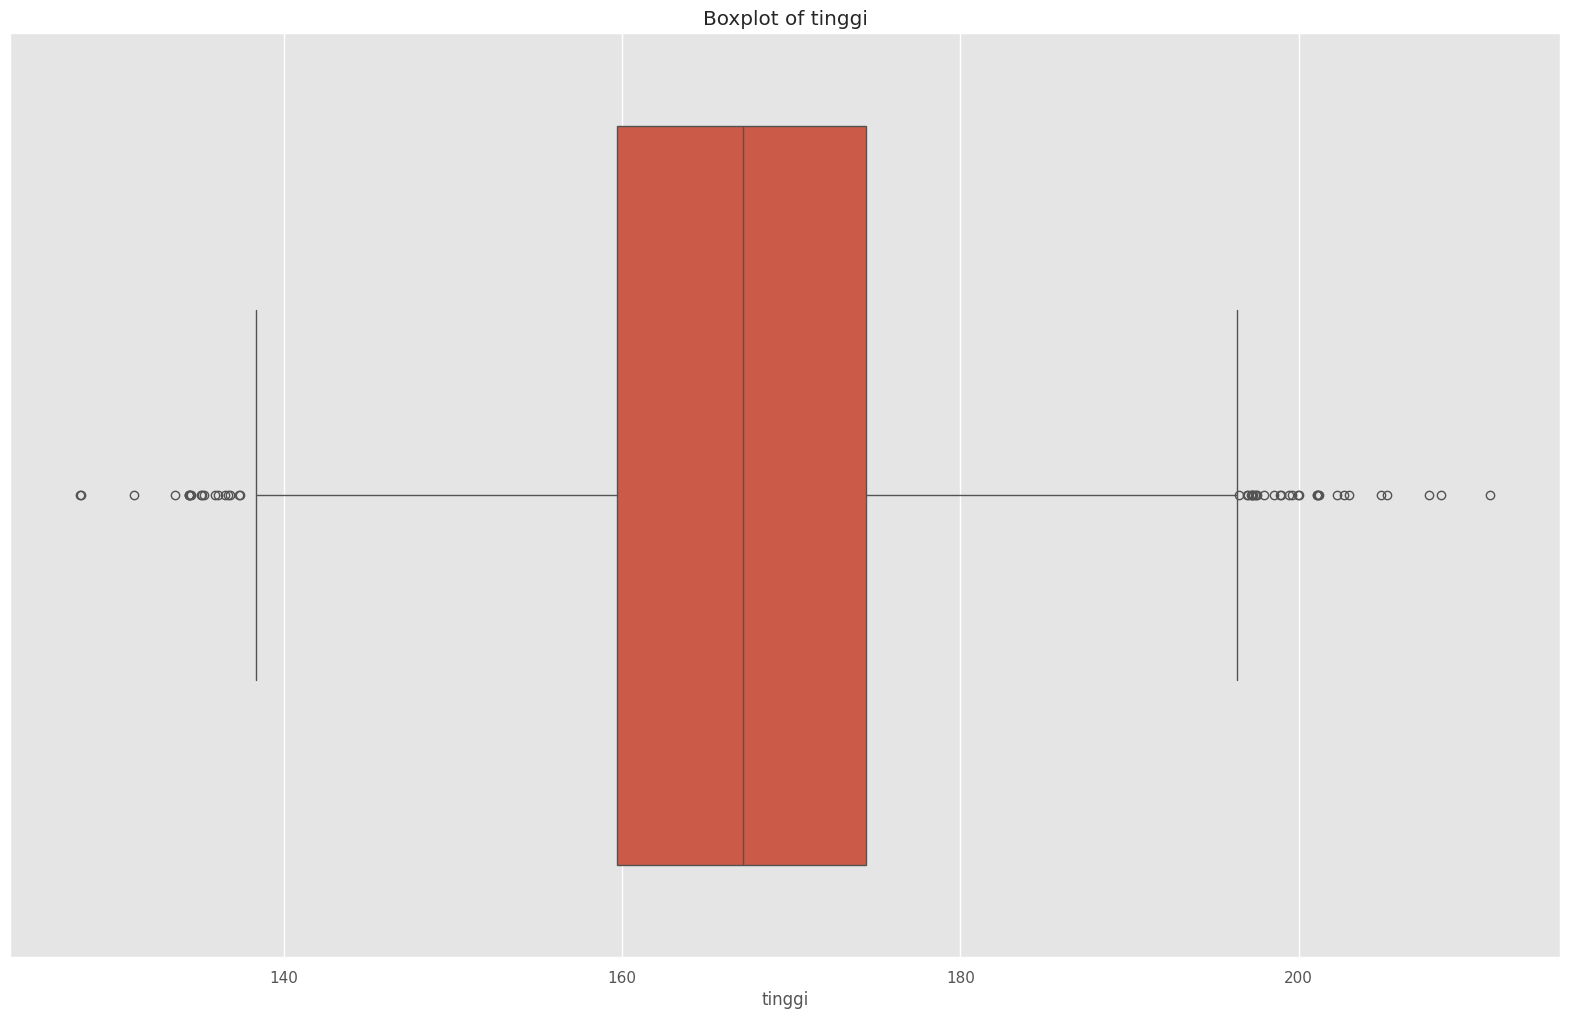

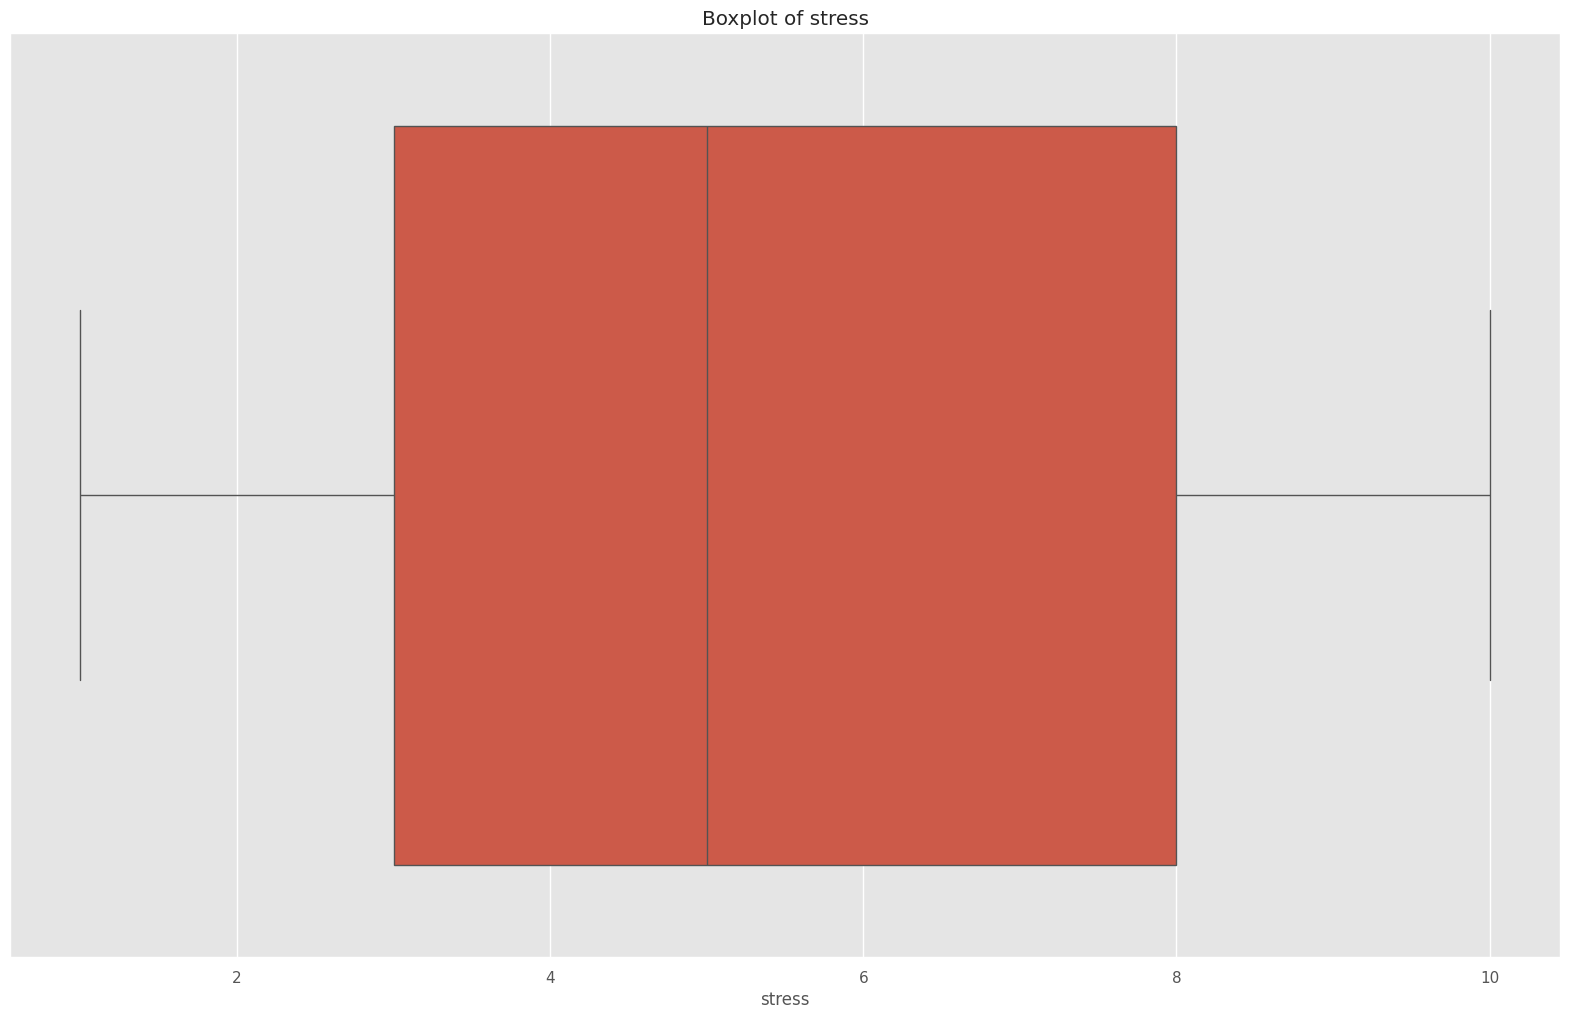

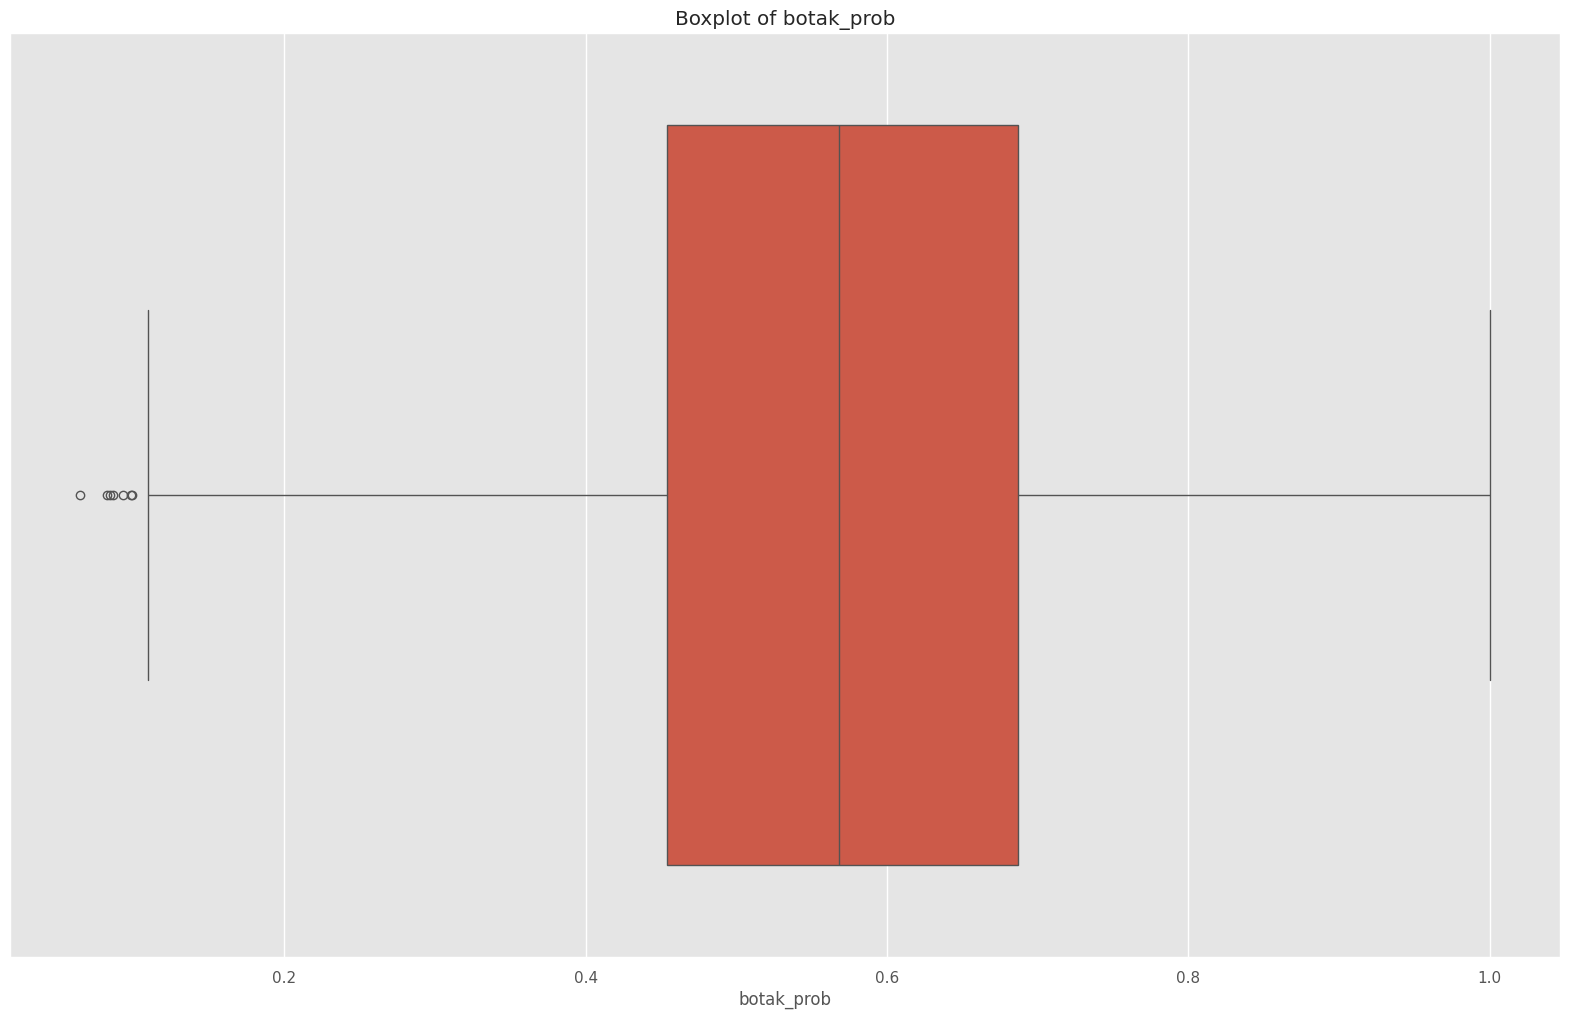

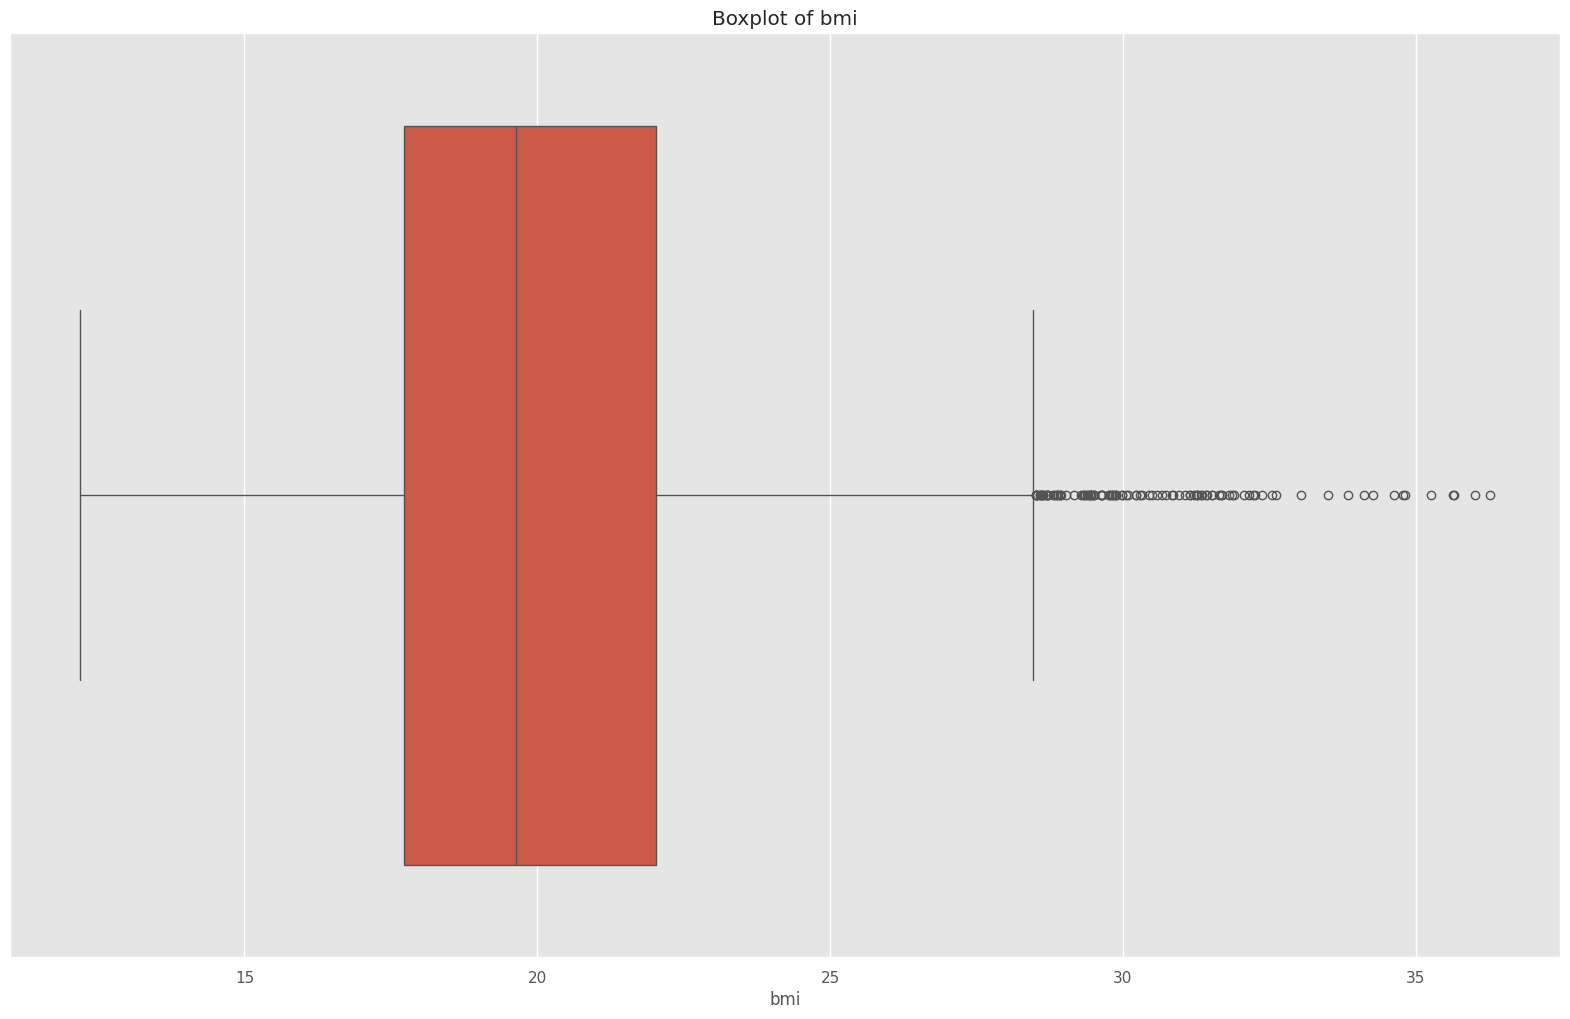

In [65]:
# now let's print out box plot to see whether the scaler is necessary for our data or not

float_cols = df_clean.select_dtypes(include=['float64']).columns

for col in float_cols:
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

we notice there're many extreme values of our data especially for `gaji`, `tinggi`, and `berat`. Thus we will scale it with `MinMaxScaler`. \
However, to **avoid** any data leakage, we will scale it after splitting.

## Train Test Split

In [83]:
# drop unnecessary variable

df_model = df_clean.drop(columns = ['bmi', 'botak_prob'])

In [84]:
# define X and y

y = df_model['is_bald']
X = df_model.drop(columns = ['is_bald'])

In [85]:
print(type(y)); print(type(X)) # just want to makesure we got the correct format

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .2, random_state = 1
)

In [129]:
print(len(X_train))
print(len(X_test))

5504
1377


In [90]:
X_train.head()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,jenis_kelamin_Perempuan,sampo_Merpati,sampo_Moonsilk,sampo_Pantone,sampo_Shoulder & Head
6696,48,1.314668e+07,1,0,56.904788,176.333400,1,7.0,1,0,0,1,0
6478,44,7.749758e+06,1,0,64.582781,169.887199,1,10.0,0,0,0,0,1
1005,55,4.789583e+06,1,0,51.377792,156.989029,1,2.0,0,1,0,0,0
1791,49,8.114909e+06,1,0,52.580695,165.084393,1,5.0,1,0,0,0,0
5535,34,4.635534e+06,1,0,44.983002,159.332529,0,2.0,0,0,0,0,0


In [94]:
# let's scale gaji, tinggi, and berat

num_cols = ['gaji', 'tinggi', 'berat']
scaler = MinMaxScaler()
# scaler.fit(X_train[num_cols])

In [95]:
# scaled

X_train_scaled = pd.DataFrame(scaler.fit_transform(df_clean[num_cols]), columns = num_cols)
X_train[num_cols] = X_train_scaled

In [97]:
X_train.head()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,jenis_kelamin_Perempuan,sampo_Merpati,sampo_Moonsilk,sampo_Pantone,sampo_Shoulder & Head
6696,48,0.240138,1,0,0.193474,0.580366,1,7.0,1,0,0,1,0
6478,44,0.128861,1,0,0.283041,0.502973,1,10.0,0,0,0,0,1
1005,55,0.067826,1,0,0.128999,0.348119,1,2.0,0,1,0,0,0
1791,49,0.136390,1,0,0.143031,0.445311,1,5.0,1,0,0,0,0
5535,34,0.064650,1,0,0.054400,0.376255,0,2.0,0,0,0,0,0


In [99]:
# Now save the scaler

dump(scaler, open('scaler.pkl', 'wb'))

In [76]:
# export to csv

df_model.to_csv("data/output/clean_data.csv", index = False)

## MODEL DEVELOPMENT

In [159]:
models = [
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    LogisticRegression(max_iter=1000, random_state=42),
    LinearSVC(max_iter=1000, random_state=42),
    KNeighborsClassifier()
]

RandomForestClassifier
Confusion Matrix


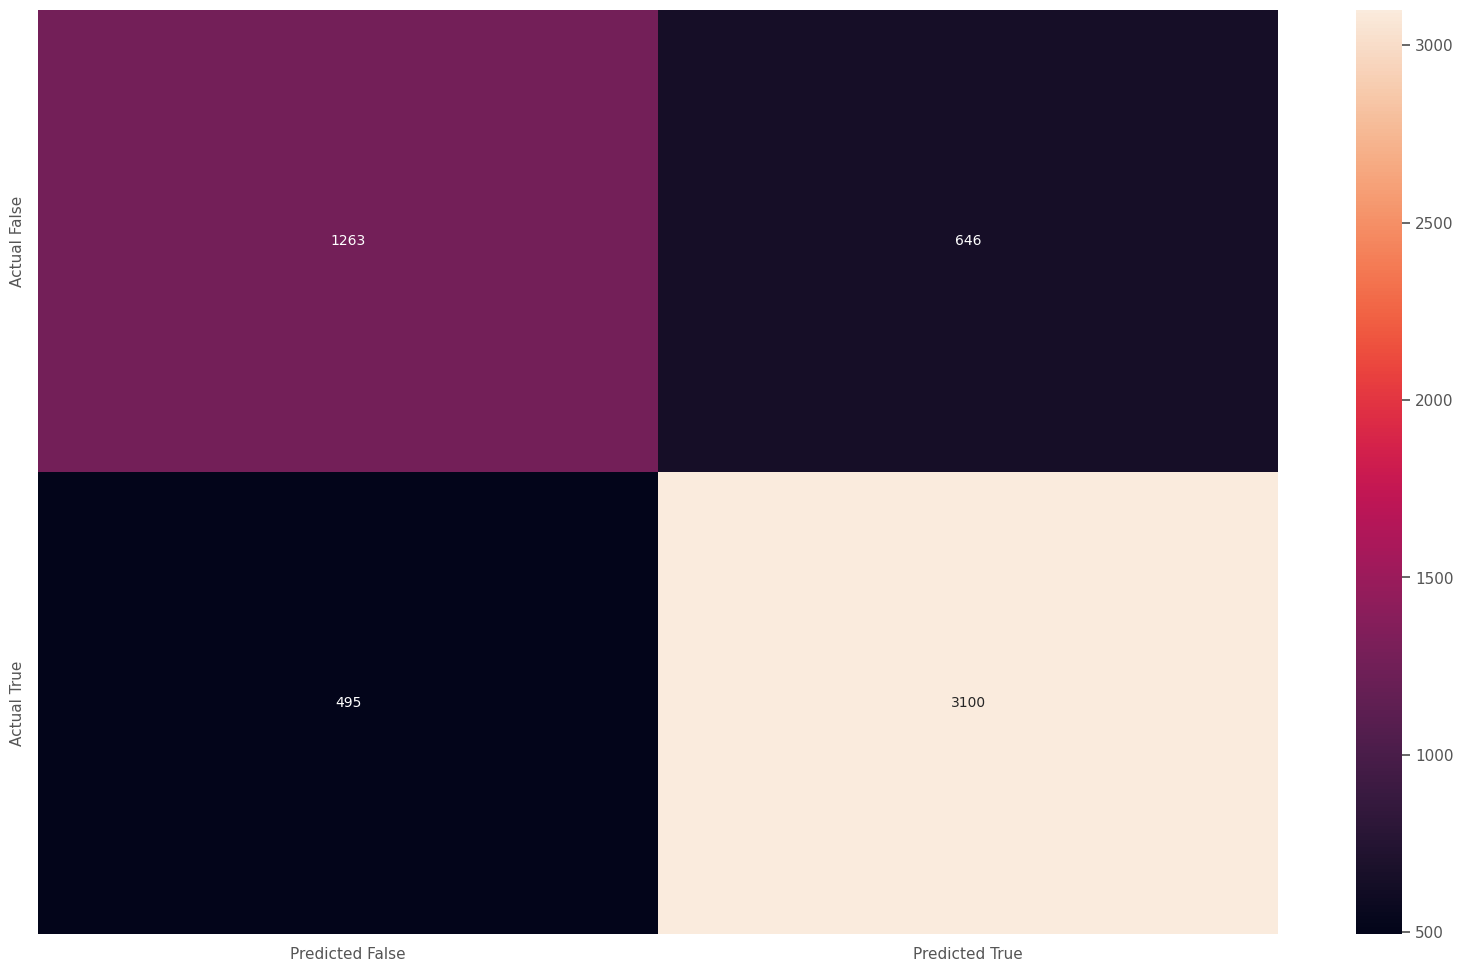

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1909
           1       0.83      0.86      0.84      3595

    accuracy                           0.79      5504
   macro avg       0.77      0.76      0.77      5504
weighted avg       0.79      0.79      0.79      5504

DecisionTreeClassifier
Confusion Matrix


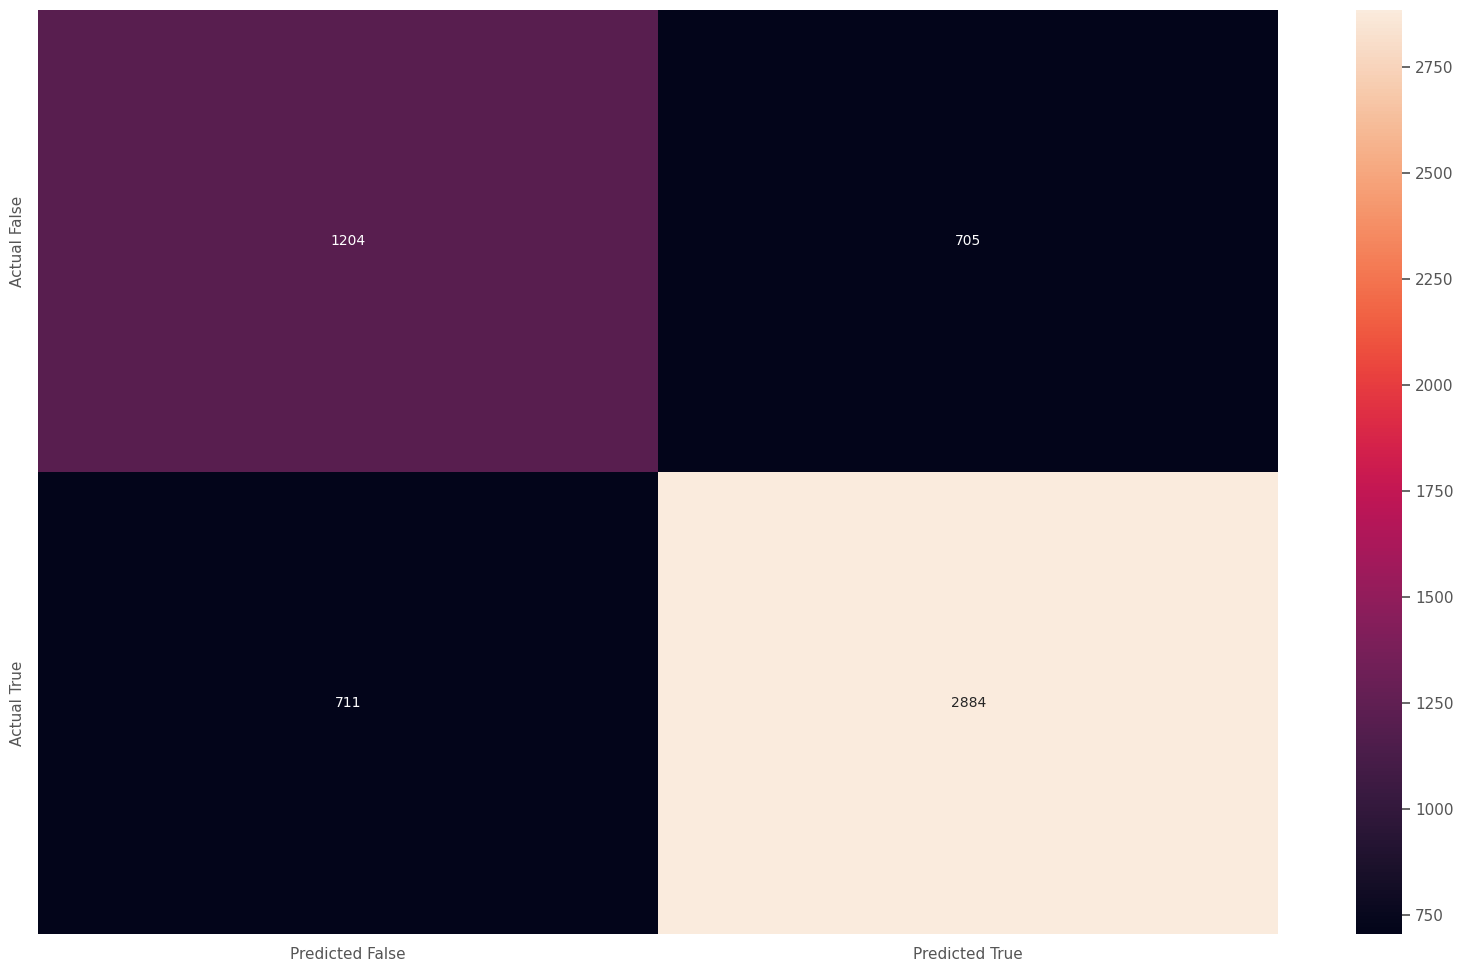

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1909
           1       0.80      0.80      0.80      3595

    accuracy                           0.74      5504
   macro avg       0.72      0.72      0.72      5504
weighted avg       0.74      0.74      0.74      5504

XGBClassifier
Confusion Matrix


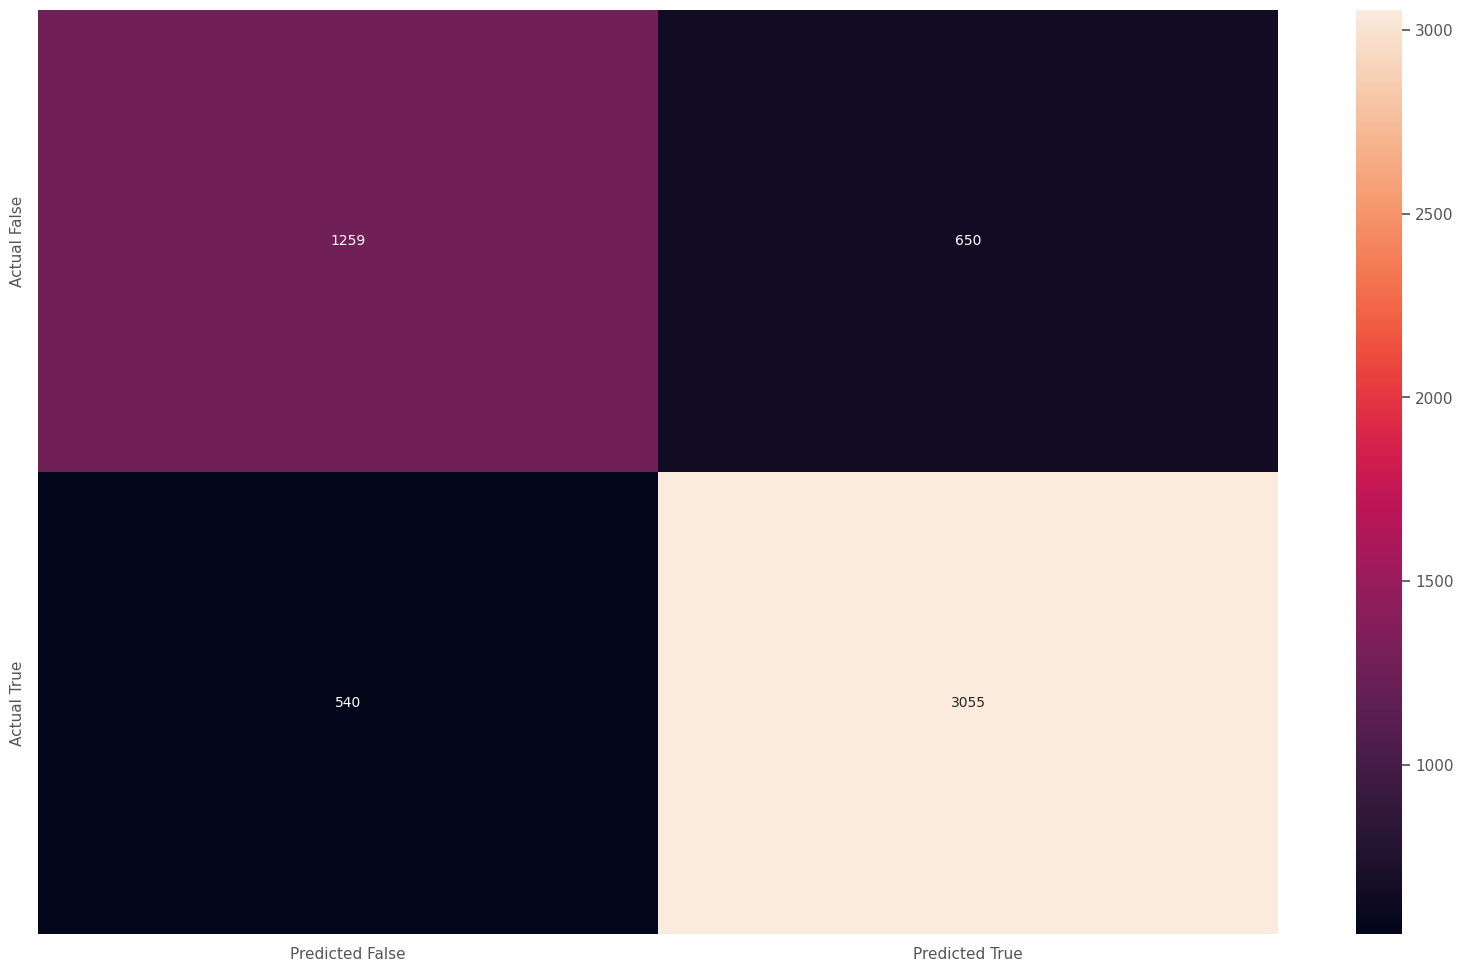

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1909
           1       0.82      0.85      0.84      3595

    accuracy                           0.78      5504
   macro avg       0.76      0.75      0.76      5504
weighted avg       0.78      0.78      0.78      5504

LogisticRegression
Confusion Matrix


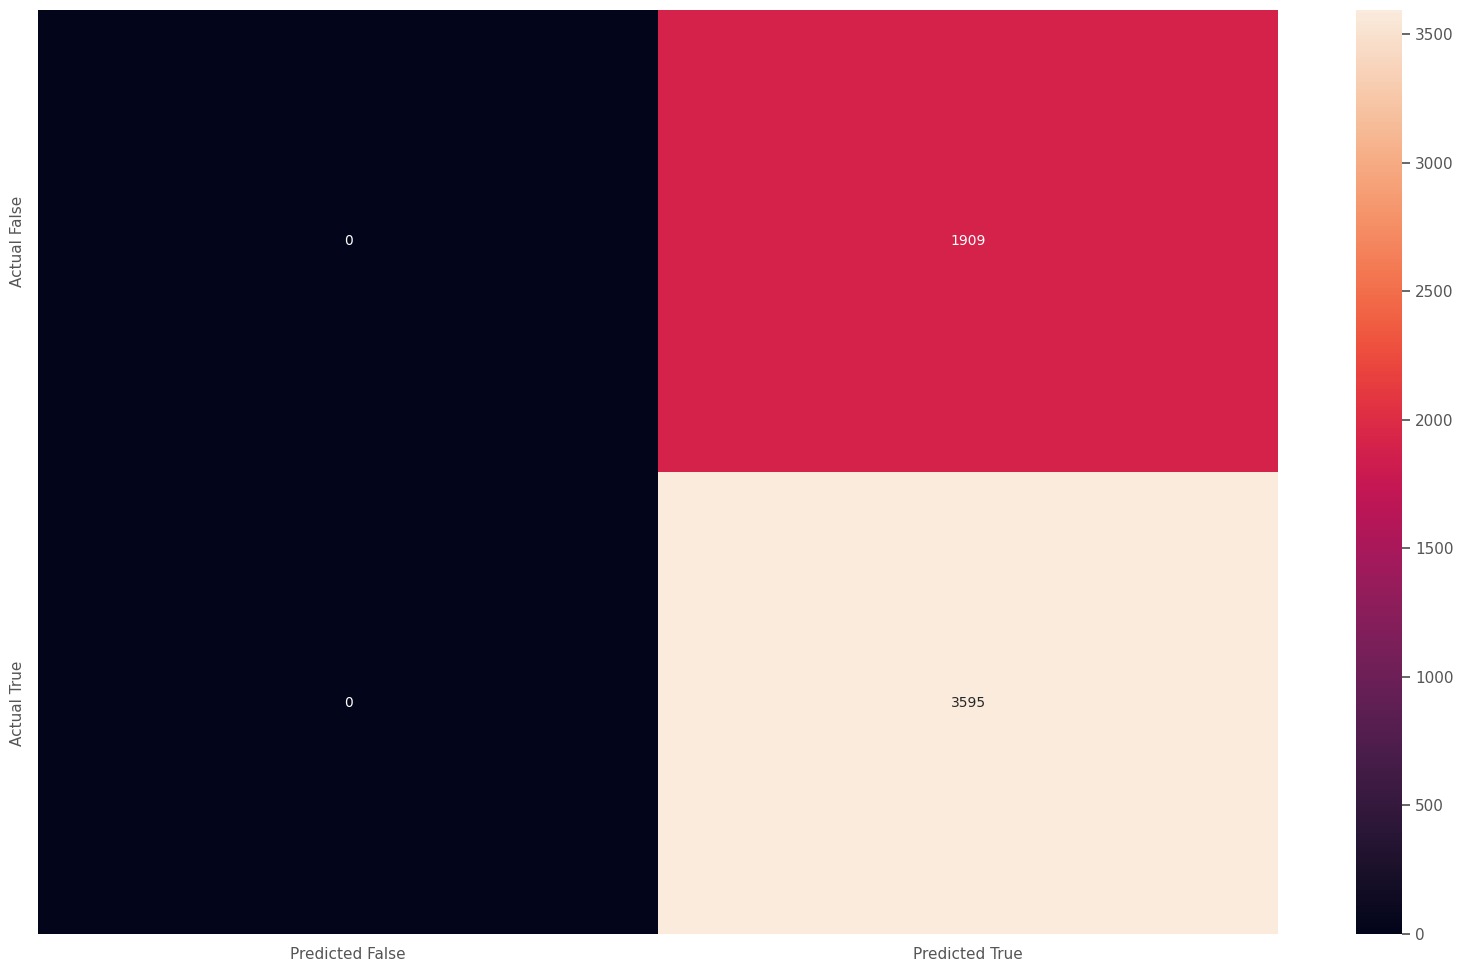

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1909
           1       0.65      1.00      0.79      3595

    accuracy                           0.65      5504
   macro avg       0.33      0.50      0.40      5504
weighted avg       0.43      0.65      0.52      5504

LinearSVC
Confusion Matrix


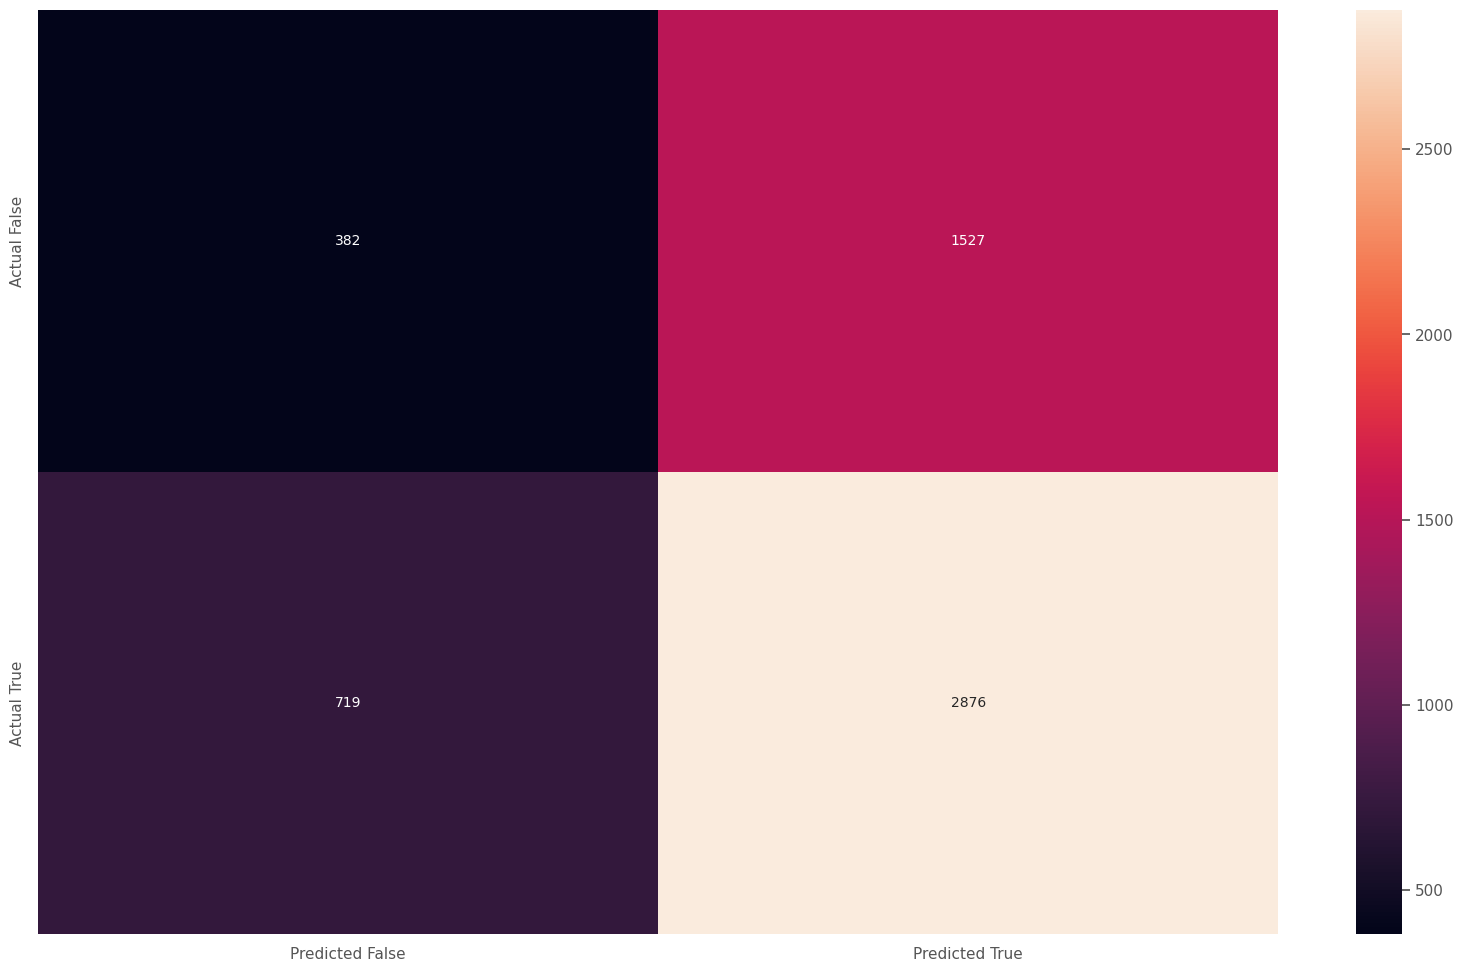

Classification Report
              precision    recall  f1-score   support

           0       0.35      0.20      0.25      1909
           1       0.65      0.80      0.72      3595

    accuracy                           0.59      5504
   macro avg       0.50      0.50      0.49      5504
weighted avg       0.55      0.59      0.56      5504

KNeighborsClassifier
Confusion Matrix


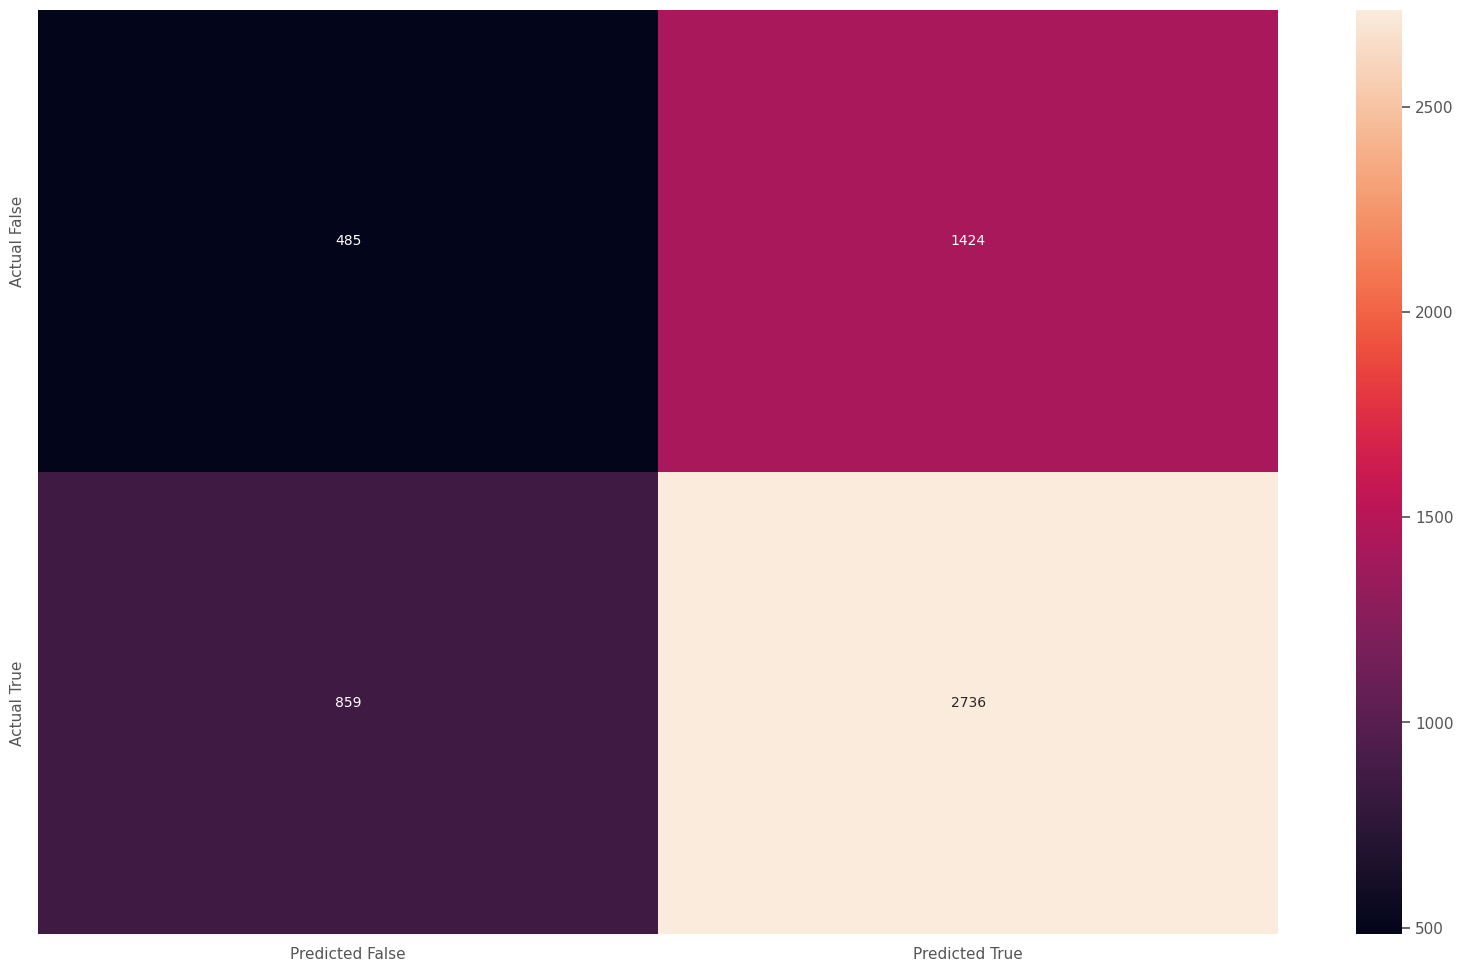

Classification Report
              precision    recall  f1-score   support

           0       0.36      0.25      0.30      1909
           1       0.66      0.76      0.71      3595

    accuracy                           0.59      5504
   macro avg       0.51      0.51      0.50      5504
weighted avg       0.55      0.59      0.56      5504



In [160]:
# perform k-fold cross validation with k = 5

for clf in models:
  y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
  print(type(clf).__name__)
  cm = confusion_matrix(y_train, y_pred)
  print('Confusion Matrix')
  sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Predicted False', 'Predicted True'], yticklabels=['Actual False', 'Actual True'])
  plt.show()
  print('Classification Report')
  print(classification_report(y_train, y_pred))

In [113]:
# Since in our business, we will pay high attention to model who lower or minimize recall score, let's adjust

# init recall
recall_scores = {}

# iterate through all models
for clf in models:
    recall = cross_val_score(clf, X_train, y_train, cv=5, scoring=make_scorer(recall_score)).mean()
    recall_scores[type(clf).__name__] = recall

In [114]:
recall_scores

{'RandomForestClassifier': 0.8623087621696801,
 'DecisionTreeClassifier': 0.8019471488178025,
 'XGBClassifier': 0.8497913769123782,
 'LogisticRegression': 0.8776077885952713,
 'LinearSVC': 0.7938803894297635,
 'KNeighborsClassifier': 0.8169680111265647}

Wow, seems like Logistic Regression outperform Random Forest and XGBoost for our data. But wait, let's check the overfitting diagnosis with test data.

## Test the Overfit with Test Set

In [116]:
# let's

clf_rf = next(clf for clf in models if isinstance(clf, RandomForestClassifier))

In [117]:
clf_rf

RandomForestClassifier(random_state=42)

In [152]:
# next summon again the X_test, reset the index

X_test = X_test.reset_index(drop = True)
X_test.head()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,jenis_kelamin_Perempuan,sampo_Merpati,sampo_Moonsilk,sampo_Pantone,sampo_Shoulder & Head
0,27,7.287000e+06,1,0,44.094048,158.232151,1,10.0,0,0,0,0,1
1,44,1.130505e+07,1,0,49.879300,155.760031,1,7.0,0,0,0,0,0
2,31,1.254256e+07,1,1,43.591533,182.759514,1,9.0,0,0,0,0,1
3,37,6.896722e+06,1,0,52.833152,168.315869,1,1.0,0,0,1,0,0
4,45,1.199151e+07,1,0,57.419240,168.770338,1,6.0,0,0,0,1,0


see? the berat, tinggi, and gaji is still in their original value. Thus, we can scale it with scaler that already we got in training phase using `scaler.pkl`

In [153]:
# load back scaler

scaler = load(open('scaler.pkl', 'rb'))

In [154]:
scaler

MinMaxScaler()

In [155]:
# get features for scaler

scaler_features = scaler.get_feature_names_out()
scaler_features

array(['gaji', 'tinggi', 'berat'], dtype=object)

In [156]:
X_test_scaled = X_test[scaler_features]
X_test_scaled = pd.DataFrame(scaler.transform(X_test_scaled), columns = scaler_features)
X_test_scaled.head()

,gaji,tinggi,berat
0,0.119320,0.363044,0.044030
1,0.202166,0.333363,0.111518
2,0.227682,0.657518,0.038168
3,0.111273,0.484108,0.145976
4,0.216320,0.489564,0.199475


In [157]:
# now lest replace the original value with scaled data\

X_test[scaler_features] = X_test_scaled
X_test.head()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,jenis_kelamin_Perempuan,sampo_Merpati,sampo_Moonsilk,sampo_Pantone,sampo_Shoulder & Head
0,27,0.119320,1,0,0.044030,0.363044,1,10.0,0,0,0,0,1
1,44,0.202166,1,0,0.111518,0.333363,1,7.0,0,0,0,0,0
2,31,0.227682,1,1,0.038168,0.657518,1,9.0,0,0,0,0,1
3,37,0.111273,1,0,0.145976,0.484108,1,1.0,0,0,1,0,0
4,45,0.216320,1,0,0.199475,0.489564,1,6.0,0,0,0,1,0


RandomForestClassifier
Confusion Matrix


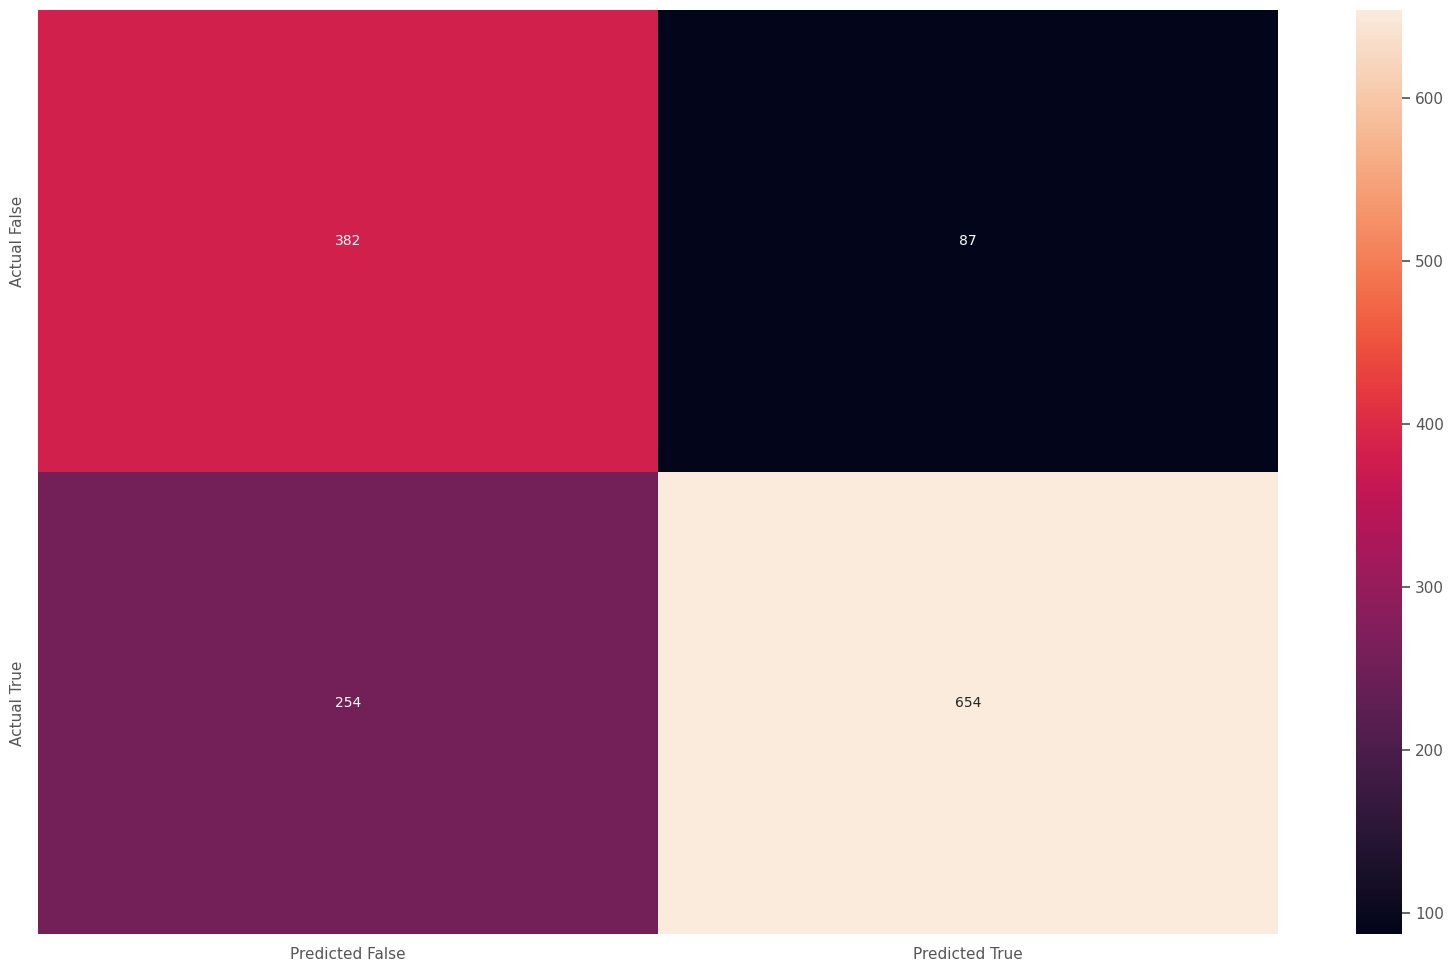

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.81      0.69       469
           1       0.88      0.72      0.79       908

    accuracy                           0.75      1377
   macro avg       0.74      0.77      0.74      1377
weighted avg       0.79      0.75      0.76      1377

DecisionTreeClassifier
Confusion Matrix


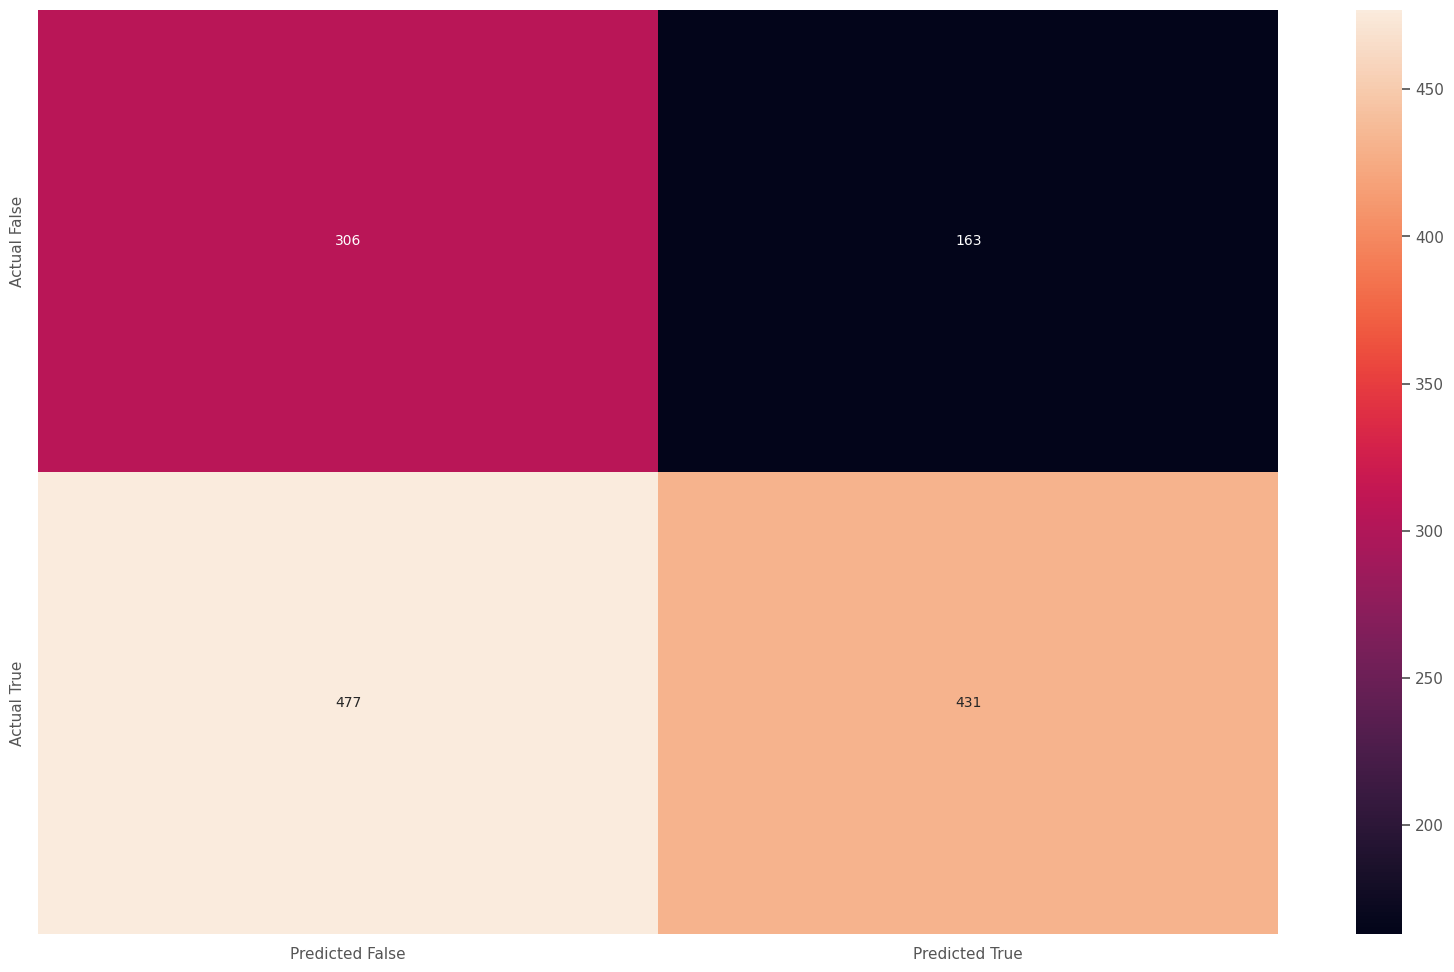

Classification Report
              precision    recall  f1-score   support

           0       0.39      0.65      0.49       469
           1       0.73      0.47      0.57       908

    accuracy                           0.54      1377
   macro avg       0.56      0.56      0.53      1377
weighted avg       0.61      0.54      0.54      1377

XGBClassifier
Confusion Matrix


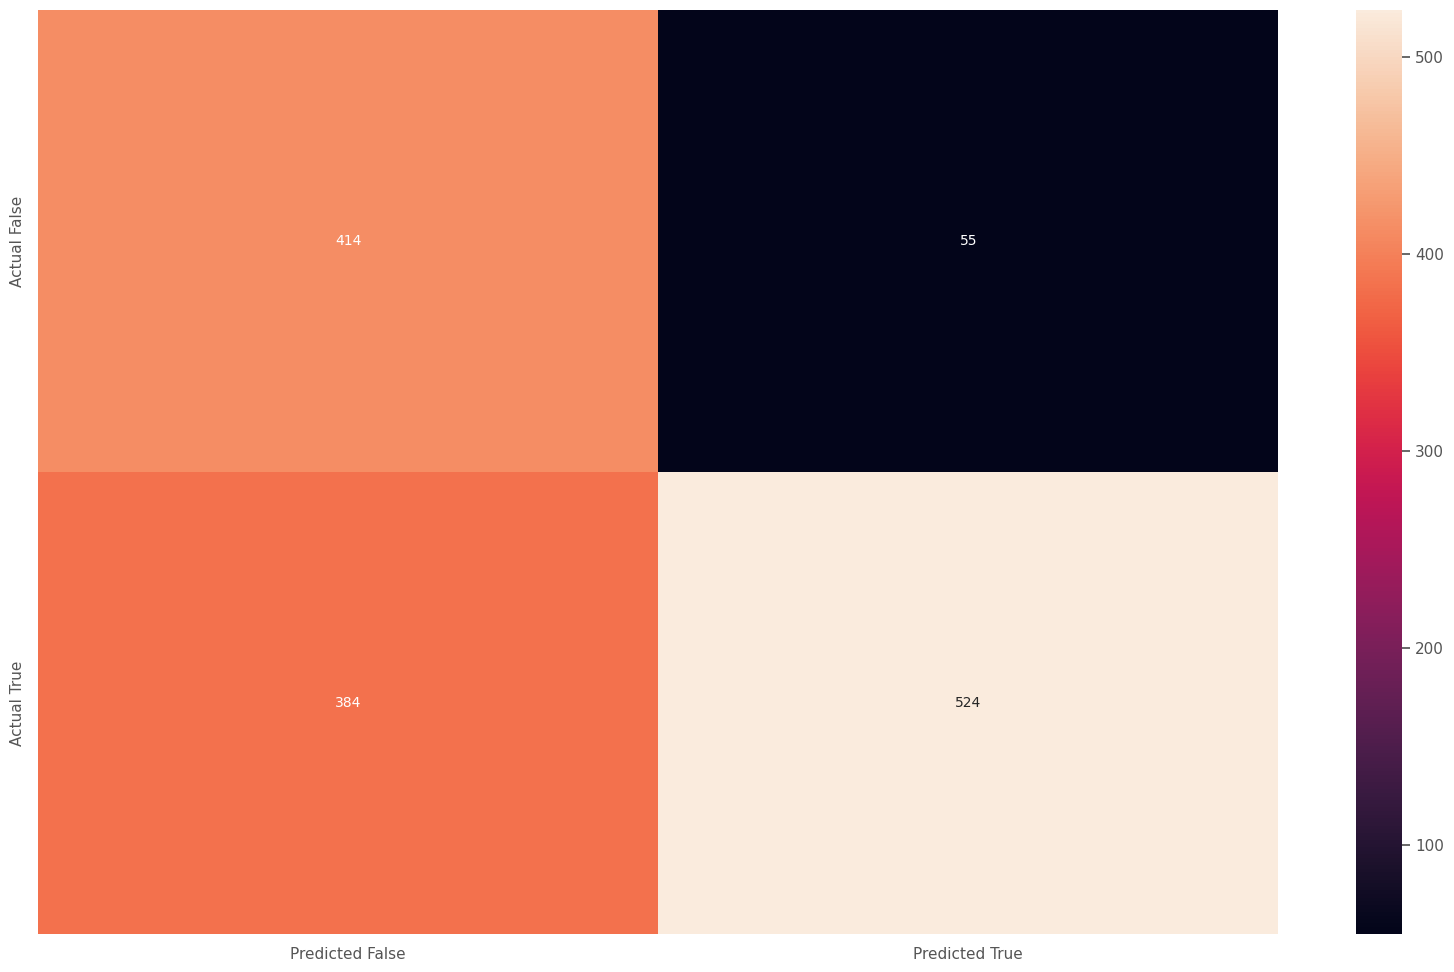

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.88      0.65       469
           1       0.91      0.58      0.70       908

    accuracy                           0.68      1377
   macro avg       0.71      0.73      0.68      1377
weighted avg       0.77      0.68      0.69      1377

LogisticRegression
Confusion Matrix


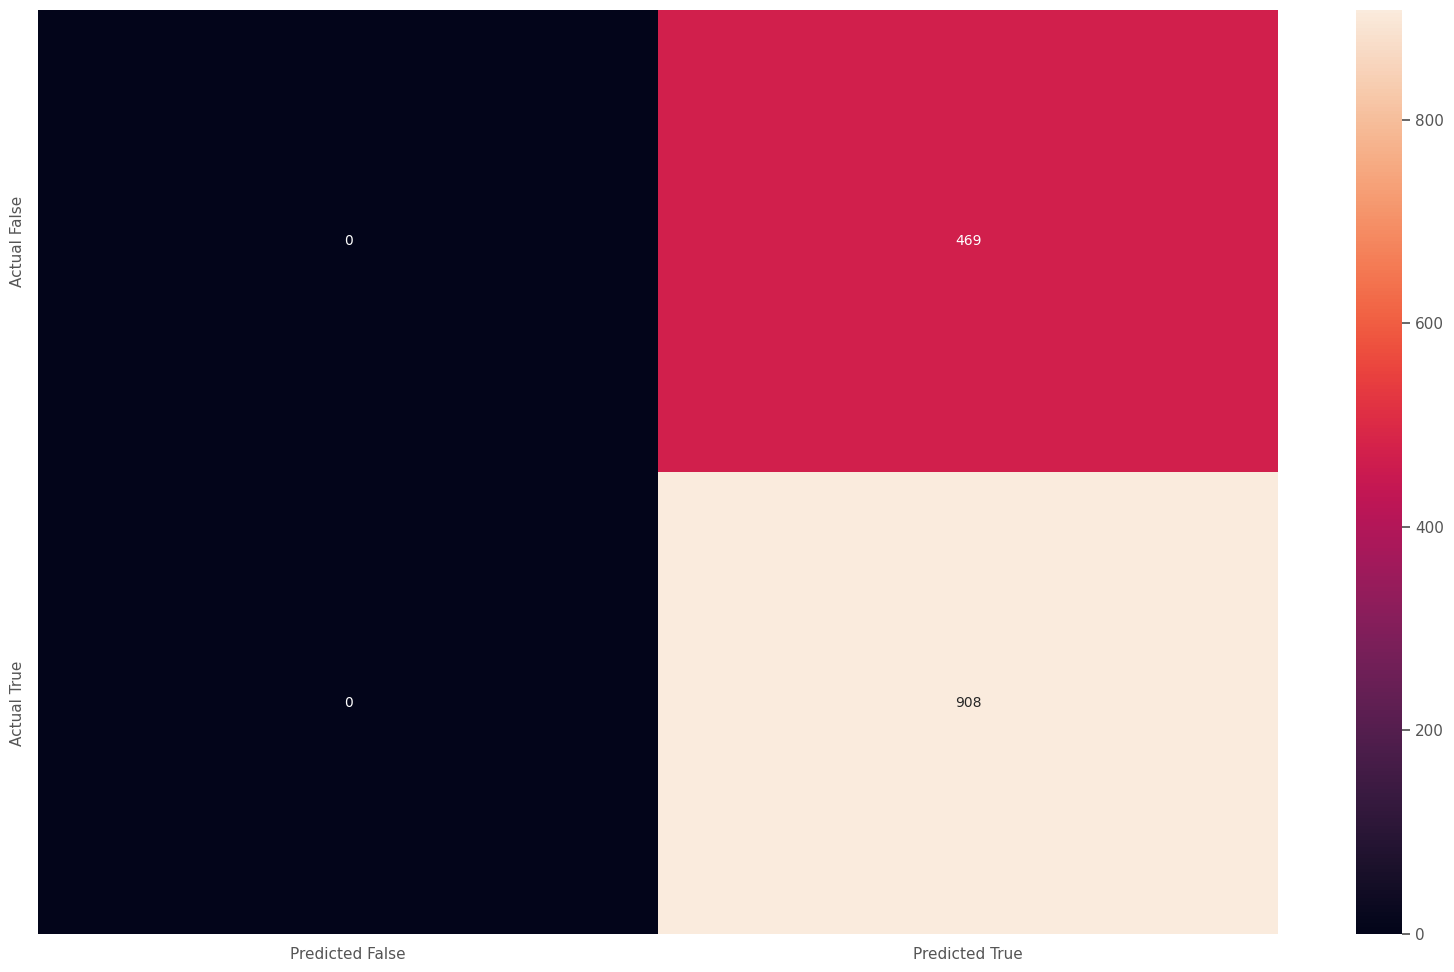

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       469
           1       0.66      1.00      0.79       908

    accuracy                           0.66      1377
   macro avg       0.33      0.50      0.40      1377
weighted avg       0.43      0.66      0.52      1377

LinearSVC
Confusion Matrix


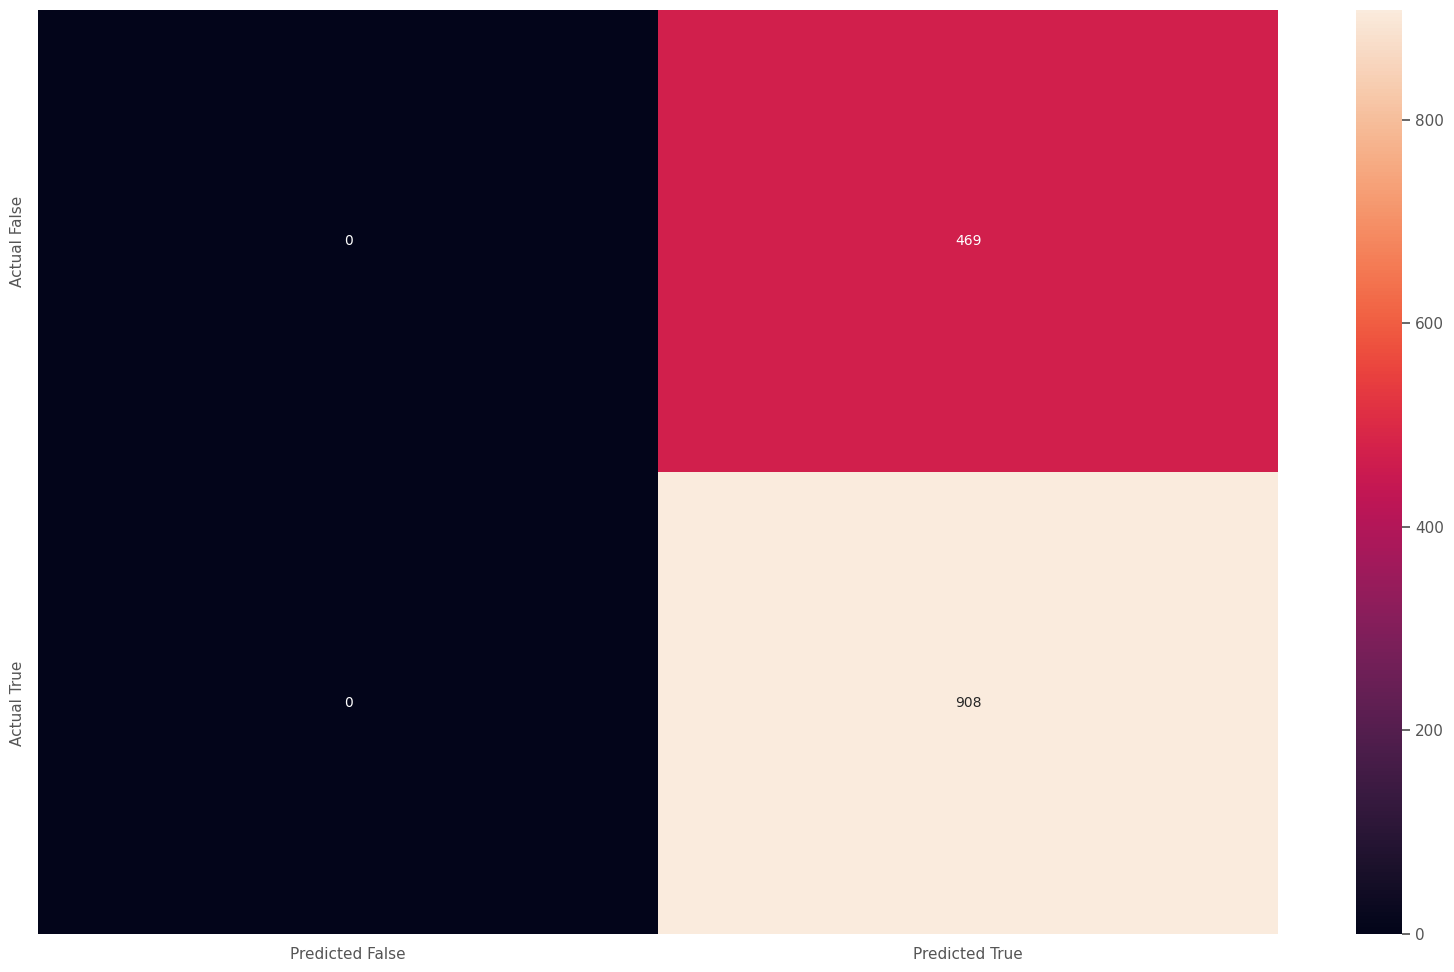

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       469
           1       0.66      1.00      0.79       908

    accuracy                           0.66      1377
   macro avg       0.33      0.50      0.40      1377
weighted avg       0.43      0.66      0.52      1377

KNeighborsClassifier
Confusion Matrix


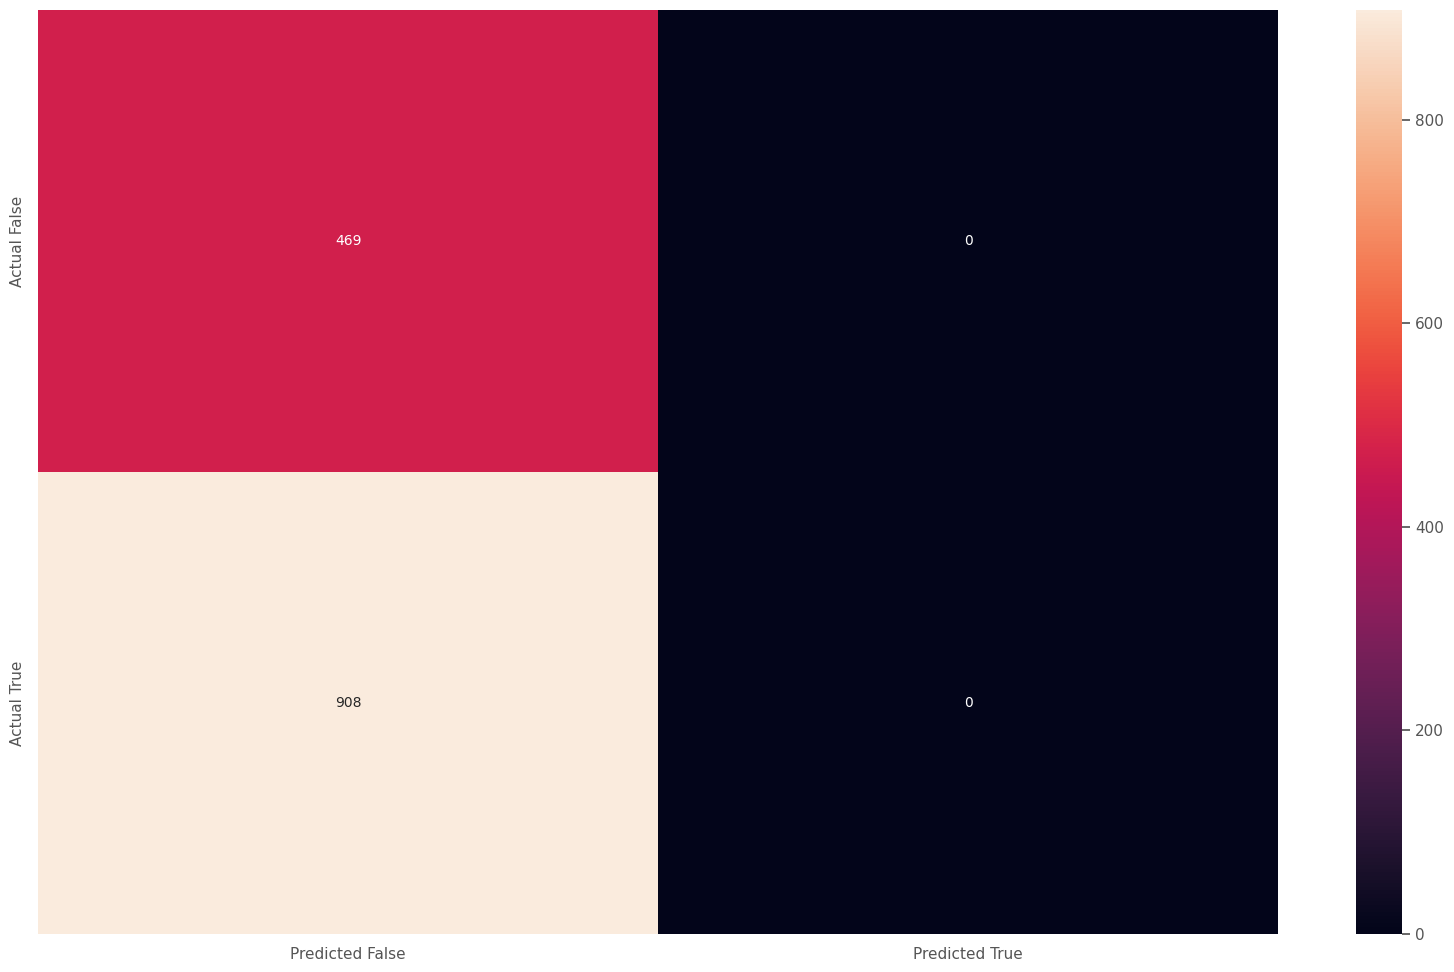

Classification Report
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       469
           1       0.00      0.00      0.00       908

    accuracy                           0.34      1377
   macro avg       0.17      0.50      0.25      1377
weighted avg       0.12      0.34      0.17      1377



In [162]:
for clf in models:
  clf.fit(X_train, y_train)
  y_pred_test = clf.predict(X_test)
  print(type(clf).__name__)
  cm2 = confusion_matrix(y_test, y_pred_test)
  print('Confusion Matrix')
  sns.heatmap(cm2, annot=True, fmt='d', xticklabels=['Predicted False', 'Predicted True'], yticklabels=['Actual False', 'Actual True'])
  plt.show()
  print('Classification Report')
  print(classification_report(y_test, y_pred_test))

In [165]:
# init recall
recall_scores_test = {}

# iterate through all models
for clf in models:
    y_pred_test = clf.predict(X_test)
    recall = recall_score(y_test, y_pred_test)
    recall_scores_test[type(clf).__name__] = recall

In [166]:
recall_scores_test

{'RandomForestClassifier': 0.7202643171806168,
 'DecisionTreeClassifier': 0.4746696035242291,
 'XGBClassifier': 0.5770925110132159,
 'LogisticRegression': 1.0,
 'LinearSVC': 1.0,
 'KNeighborsClassifier': 0.0}

We see interesting finding here.
* Our top model, logistic regression didn't overfit the data since train recall < test recall. Our model 100% correctly predict the baldiness on test data yet fails to recognize those who aren't baldy.In other words, it predicts all the person will be baldy. Which is *bad sign in production*.
* Our second model, random forest seems overfit the data since train recall > test recall. However, it doesn't predict all the test data to be bald. Which we can optimize this model and do regularization to minimize overfitting. Thus, we will choose model random forest for our best model and perform hyperparameter tuning later.